<a href="https://colab.research.google.com/github/CristaldoWeint/M71V-M72V_06-M-todos-de-An-lisis-Multivariado---C09-2024/blob/main/CRISTALDO_Multivariado_TFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

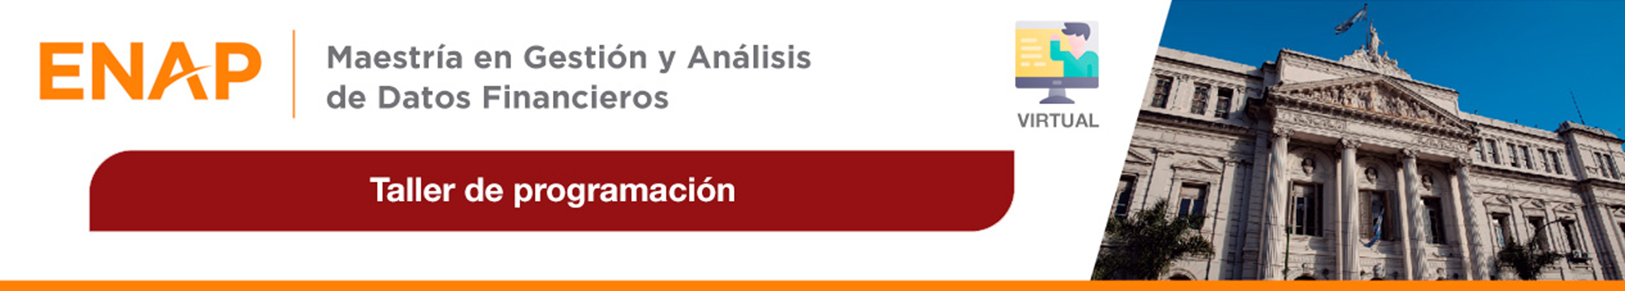

M71V MAESTRÍA EN GESTIÓN Y ANÁLISIS DE DATOS FINANCIEROS
# M71V/M72V_06 Métodos de Análisis Multivariado

## TRABAJO FINAL

Profesora: Blanca Vitale

Alumno: **CRISTALDO VALENZUELA, MAURICIO EMANUEL**

#OBTENCION DE INFORMACIÓN

In [9]:
#1. Mediante conexión a la API de Kaggle con Python:importe el archivo de datos “200+ Financial Indicators of US stocks (2014-2018)”.
!pip install kaggle
import pandas as pd #Importamos la librería pandas para utlizar la función que lee .csv (o .xlsx o .txt, etc)

# Configuración de la API de Kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Descargar el dataset el archivo
dataset = "mauriciocristaldo/eepp-e-indicadores-seguros-argentina-2024-06"
file = "indicadores_sinensup_202406_corregido.csv"
!kaggle datasets download -d {dataset} -f {file}



mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mauriciocristaldo/eepp-e-indicadores-seguros-argentina-2024-06
License(s): DbCL-1.0
  0% 0.00/155k [00:00<?, ?B/s]
100% 155k/155k [00:00<00:00, 5.27MB/s]


In [80]:
df_original = pd.read_csv('/content/indicadores_sinensup_202406_corregido.csv', sep=';') #/content/indicadores_sinensup_202406_corregido.csv

In [81]:
df_original.head()

,Entidad N,Entidad NJ,Entidad Denominacion,SEGMENTO,Rank,TOP,A- Disponibilidades,A- Inversiones,A- Creditos,A- Inmuebles,...,RF - Resultados porTenencia,RF - OtrosIngresos,RF - OtrosEgresos,RF - Gastos deExplotacion yOtros Cargos,RF - RECPAM,RF - TOTAL,RF - ResultadoOperacionesOrdinarias,RF - Resultado OperacionesExtraordinarias,RF - Impuestoa lasGanancias,RF - RESULTADODELEJERCICIO
0,1,A,AFIANZADORA,PM,92,RESTO,7.534390e+04,4.418959e+06,2.538016e+06,0.000000e+00,...,0.000000e+00,0.000,-286023.633,-1441457.503,-3.062344e+06,-2.099534e+06,3.586780e+05,0.0,-2.354916e+05,1.231864e+05
1,2,C,AGROSALTA,PM,113,RESTO,2.256459e+06,6.147431e+07,1.358144e+07,1.764929e+07,...,4.415820e+07,0.000,-837382.362,-330014.242,-6.548793e+07,-1.891490e+07,-1.526299e+07,0.0,0.000000e+00,-1.526299e+07
2,3,A,ALBA,PM,121,RESTO,1.207561e+05,3.055744e+06,9.179537e+05,2.597781e+05,...,3.690407e+06,-1.119,-936868.376,-2514450.999,-2.484058e+06,2.411046e+05,4.484604e+05,0.0,-4.229918e+04,4.061612e+05
3,4,A,ALLIANZ,PM,11,20,1.387707e+07,2.869870e+08,1.256212e+08,7.954588e+06,...,3.352328e+08,357754.610,0.000,-4917388.283,-5.209753e+08,-6.041762e+07,-3.653974e+07,0.0,1.045464e+07,-2.608509e+07
4,5,A,ANTaRTIDA,PM,123,RESTO,1.887429e+05,3.332890e+05,1.188759e+06,8.732468e+06,...,5.113801e+04,-148.153,0.000,-1325125.271,1.112795e+06,9.100645e+05,2.278367e+06,0.0,0.000000e+00,2.278367e+06


In [12]:
import pandas as pd

print(df_original.dtypes)

Entidad N                                       int64
Entidad NJ                                     object
Entidad Denominacion                           object
SEGMENTO                                       object
Rank                                            int64
                                               ...   
RF -  TOTAL                                   float64
RF -  ResultadoOperacionesOrdinarias          float64
RF -  Resultado OperacionesExtraordinarias    float64
RF -  Impuestoa lasGanancias                  float64
RF -  RESULTADODELEJERCICIO                   float64
Length: 87, dtype: object


In [13]:
df_corr = df_original.iloc[:, 6:]
df_corr.head()

,A- Disponibilidades,A- Inversiones,A- Creditos,A- Inmuebles,A- Bienes de Uso,A- Otros,A- TOTAL,P- Deudas c/Asegurados,P- Otras Deudas,P- Compromisos Tecnicos,...,RF - Resultados porTenencia,RF - OtrosIngresos,RF - OtrosEgresos,RF - Gastos deExplotacion yOtros Cargos,RF - RECPAM,RF - TOTAL,RF - ResultadoOperacionesOrdinarias,RF - Resultado OperacionesExtraordinarias,RF - Impuestoa lasGanancias,RF - RESULTADODELEJERCICIO
0,7.534390e+04,4.418959e+06,2.538016e+06,0.000000e+00,2.805741e+05,487.618,7.313381e+06,5.479394e+05,3.058200e+06,1.339325e+06,...,0.000000e+00,0.000,-286023.633,-1441457.503,-3.062344e+06,-2.099534e+06,3.586780e+05,0.0,-2.354916e+05,1.231864e+05
1,2.256459e+06,6.147431e+07,1.358144e+07,1.764929e+07,6.439812e+06,0.000,1.014013e+08,1.792510e+07,3.025772e+06,2.683422e+06,...,4.415820e+07,0.000,-837382.362,-330014.242,-6.548793e+07,-1.891490e+07,-1.526299e+07,0.0,0.000000e+00,-1.526299e+07
2,1.207561e+05,3.055744e+06,9.179537e+05,2.597781e+05,2.878371e+06,590959.237,7.823562e+06,3.256080e+05,1.893068e+06,7.264428e+05,...,3.690407e+06,-1.119,-936868.376,-2514450.999,-2.484058e+06,2.411046e+05,4.484604e+05,0.0,-4.229918e+04,4.061612e+05
3,1.387707e+07,2.869870e+08,1.256212e+08,7.954588e+06,2.982617e+07,4199252.894,4.684653e+08,1.368835e+08,6.348320e+07,4.630491e+07,...,3.352328e+08,357754.610,0.000,-4917388.283,-5.209753e+08,-6.041762e+07,-3.653974e+07,0.0,1.045464e+07,-2.608509e+07
4,1.887429e+05,3.332890e+05,1.188759e+06,8.732468e+06,1.933008e+06,14865.328,1.239113e+07,4.287364e+06,1.808519e+06,4.140773e+05,...,5.113801e+04,-148.153,0.000,-1325125.271,1.112795e+06,9.100645e+05,2.278367e+06,0.0,0.000000e+00,2.278367e+06


In [14]:
df_corr.corr()

,A- Disponibilidades,A- Inversiones,A- Creditos,A- Inmuebles,A- Bienes de Uso,A- Otros,A- TOTAL,P- Deudas c/Asegurados,P- Otras Deudas,P- Compromisos Tecnicos,...,RF - Resultados porTenencia,RF - OtrosIngresos,RF - OtrosEgresos,RF - Gastos deExplotacion yOtros Cargos,RF - RECPAM,RF - TOTAL,RF - ResultadoOperacionesOrdinarias,RF - Resultado OperacionesExtraordinarias,RF - Impuestoa lasGanancias,RF - RESULTADODELEJERCICIO
A- Disponibilidades,1.000000,0.614709,0.653570,0.438003,0.449687,0.440943,0.692978,0.614902,0.658810,0.260688,...,0.509934,0.590202,-0.116222,-0.555421,-0.608623,-0.264008,-0.104495,0.000723,-0.169662,-0.206725
A- Inversiones,0.614709,1.000000,0.645979,0.254663,0.452991,0.220670,0.968453,0.711540,0.631788,0.685599,...,0.858002,0.529624,-0.406986,-0.609256,-0.951082,-0.486765,0.095063,0.001855,-0.386872,-0.046646
A- Creditos,0.653570,0.645979,1.000000,0.491472,0.765871,0.589056,0.802253,0.738435,0.880120,0.145138,...,0.603530,0.349116,-0.128107,-0.763488,-0.720531,-0.284993,-0.256783,0.004282,-0.169877,-0.400864
A- Inmuebles,0.438003,0.254663,0.491472,1.000000,0.432653,0.740725,0.410034,0.249363,0.502066,0.225720,...,0.071413,0.371830,0.002658,-0.514538,-0.189559,-0.198018,-0.169189,0.010044,0.020053,-0.206883
A- Bienes de Uso,0.449687,0.452991,0.765871,0.432653,1.000000,0.554679,0.615651,0.548429,0.745700,0.079824,...,0.371720,0.194163,-0.054382,-0.484243,-0.472607,-0.190212,-0.315612,0.005451,-0.155701,-0.469676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RF - TOTAL,-0.264008,-0.486765,-0.284993,-0.198018,-0.190212,-0.128887,-0.468217,-0.228268,-0.324082,-0.540648,...,-0.393987,-0.257611,0.807455,0.176129,0.478467,1.000000,0.341329,0.000507,-0.266843,0.319199
RF - ResultadoOperacionesOrdinarias,-0.104495,0.095063,-0.256783,-0.169189,-0.315612,-0.169426,-0.009937,-0.006388,-0.077130,0.100066,...,0.221069,0.071476,0.108866,0.013371,-0.103177,0.341329,1.000000,0.011516,-0.734422,0.955703
RF - Resultado OperacionesExtraordinarias,0.000723,0.001855,0.004282,0.010044,0.005451,0.000368,0.003129,0.001568,0.006846,0.000215,...,0.001535,-0.000930,0.000231,-0.000405,-0.001805,0.000507,0.011516,1.000000,-0.006411,0.012064
RF - Impuestoa lasGanancias,-0.169662,-0.386872,-0.169877,0.020053,-0.155701,-0.035885,-0.349527,-0.237253,-0.246334,-0.185059,...,-0.490424,-0.085313,-0.109622,0.259631,0.409426,-0.266843,-0.734422,-0.006411,1.000000,-0.502128


# PCA para variables patrimoniales

In [82]:
columnas_a_extraer = [6,7,8,9,10,11,13,14,15,16,18]

In [83]:
df_pca_pat = df_original.iloc[:, columnas_a_extraer].abs()

In [84]:
df_pca_pat.head()

,A- Disponibilidades,A- Inversiones,A- Creditos,A- Inmuebles,A- Bienes de Uso,A- Otros,P- Deudas c/Asegurados,P- Otras Deudas,P- Compromisos Tecnicos,P- Previsiones,PATRIMONIO NETO
0,7.534390e+04,4.418959e+06,2.538016e+06,0.000000e+00,2.805741e+05,487.618,5.479394e+05,3.058200e+06,1.339325e+06,4110.827,2.363805e+06
1,2.256459e+06,6.147431e+07,1.358144e+07,1.764929e+07,6.439812e+06,0.000,1.792510e+07,3.025772e+06,2.683422e+06,43410.417,7.772361e+07
2,1.207561e+05,3.055744e+06,9.179537e+05,2.597781e+05,2.878371e+06,590959.237,3.256080e+05,1.893068e+06,7.264428e+05,758765.282,4.119678e+06
3,1.387707e+07,2.869870e+08,1.256212e+08,7.954588e+06,2.982617e+07,4199252.894,1.368835e+08,6.348320e+07,4.630491e+07,1902365.466,2.198913e+08
4,1.887429e+05,3.332890e+05,1.188759e+06,8.732468e+06,1.933008e+06,14865.328,4.287364e+06,1.808519e+06,4.140773e+05,24026.538,5.857145e+06


In [85]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Suponiendo que df_pca_pat es tu DataFrame
X = df_pca_pat.values

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [86]:
#ocultar texto warning
import warnings
warnings.filterwarnings('ignore')

In [87]:
pca = PCA()
principal_components_pat = pca.fit_transform(X_scaled)

In [88]:
# Explicar la varianza por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.55882442, 0.14911862, 0.11040821, 0.05257093, 0.04649548,
       0.02786974, 0.02006952, 0.01821243, 0.00947242, 0.00695823,
       0.        ])

In [89]:
principal_components_pat

array([[-1.02596907e+00, -3.04446593e-02, -1.53724455e-01, ...,
        -6.45808101e-02,  5.28602469e-03, -3.76680536e-16],
       [ 2.73398435e-01,  5.67495997e-01,  1.93870756e-01, ...,
         6.55004147e-01, -2.07515518e-01,  3.14121626e-15],
       [-9.72010105e-01,  2.94173858e-02, -1.76182823e-01, ...,
        -9.96145317e-02, -6.97176940e-03, -6.84454513e-16],
       ...,
       [-7.63757023e-01, -2.88705576e-01,  3.10169117e-01, ...,
        -4.31955853e-02, -8.69458979e-02,  7.10876938e-16],
       [-1.09085104e+00,  1.04377119e-02, -1.17120575e-01, ...,
        -1.05505582e-03,  4.06076514e-03, -3.12335199e-16],
       [-1.12224396e+00, -4.20487041e-02, -1.39692516e-01, ...,
        -2.42597359e-02,  2.04034377e-02, -5.10720213e-16]])

In [90]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(0, len(df_pca_pat.columns))], index=df_pca_pat.columns[0:])
loadings

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
A- Disponibilidades,0.311870,-0.034913,0.074757,-0.355164,0.692455,-0.421119,0.280036,0.025203,-0.167711,0.073500,0.019202
A- Inversiones,0.319740,-0.403667,0.265923,0.042104,-0.044472,0.111658,-0.055301,0.164573,0.166384,-0.215445,0.737322
A- Creditos,0.376926,0.039901,-0.162738,0.099611,-0.055120,-0.023465,-0.247725,-0.344712,0.131045,0.769213,0.165178
A- Inmuebles,0.234008,0.448205,0.298296,-0.415608,-0.168860,0.431768,0.351954,-0.357849,0.073639,-0.089767,0.047906
A- Bienes de Uso,0.315653,0.185432,-0.169472,0.562080,-0.179323,-0.048306,0.600836,0.204249,-0.281350,0.032270,0.062555
A- Otros,0.257626,0.491566,0.083209,-0.244757,-0.261634,-0.225867,-0.399988,0.566009,-0.152917,0.013788,0.041993
P- Deudas c/Asegurados,0.317765,-0.227947,-0.284634,-0.120790,0.217929,0.643417,-0.030758,0.417406,0.062108,0.082640,-0.322675
P- Otras Deudas,0.361189,0.100164,-0.032767,0.286720,0.206591,0.108255,-0.449652,-0.392935,-0.403344,-0.440160,-0.093898
P- Compromisos Tecnicos,0.127914,-0.267925,0.785633,0.186346,-0.104789,-0.011961,-0.018458,0.065291,-0.126002,0.221158,-0.423551
P- Previsiones,0.213076,-0.472547,-0.260956,-0.412476,-0.525635,-0.202146,0.090035,-0.165544,-0.337866,-0.083322,-0.138931


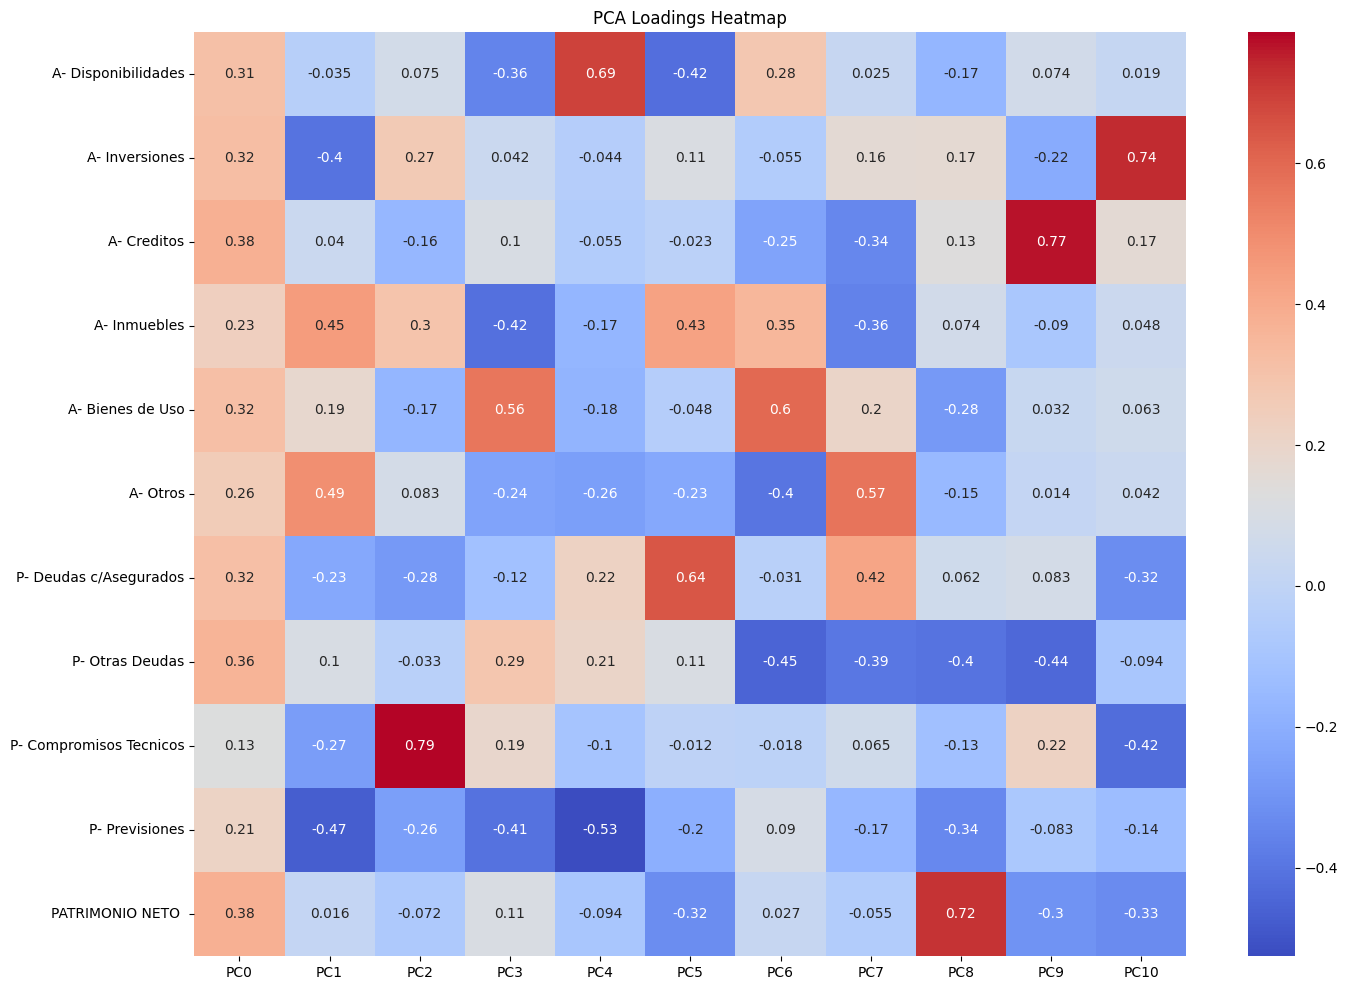

In [91]:
import seaborn as sns

# heatmap de la varianza de los componentes
plt.figure(figsize=(16, 12))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title('PCA Loadings Heatmap')
plt.show()

EL modelo sera PC0, pero si nos interesa que tenga menor deuda con asegurados será PC6 para compañias con baja inversion y baja deuda.

In [92]:
# umbral para el cual extraer las variables
threshold = 0.3

# Buscar las variables de mayor importancia dentro de cada componente
important_features = {}
for column in loadings.columns:
    important_features[column] = loadings.index[loadings[column].abs() > threshold].tolist()

# obtener el nombre de las variables encoentradas
for pc, features in important_features.items():
    print(f"{pc}: {', '.join(features)}")

PC0: A- Disponibilidades, A- Inversiones, A- Creditos, A- Bienes de Uso, P- Deudas c/Asegurados, P- Otras Deudas, PATRIMONIO NETO 
PC1: A- Inversiones, A- Inmuebles, A- Otros, P- Previsiones
PC2: P- Compromisos Tecnicos
PC3: A- Disponibilidades, A- Inmuebles, A- Bienes de Uso, P- Previsiones
PC4: A- Disponibilidades, P- Previsiones
PC5: A- Disponibilidades, A- Inmuebles, P- Deudas c/Asegurados, PATRIMONIO NETO 
PC6: A- Inmuebles, A- Bienes de Uso, A- Otros, P- Otras Deudas
PC7: A- Creditos, A- Inmuebles, A- Otros, P- Deudas c/Asegurados, P- Otras Deudas
PC8: P- Otras Deudas, P- Previsiones, PATRIMONIO NETO 
PC9: A- Creditos, P- Otras Deudas, PATRIMONIO NETO 
PC10: A- Inversiones, P- Deudas c/Asegurados, P- Compromisos Tecnicos, PATRIMONIO NETO 


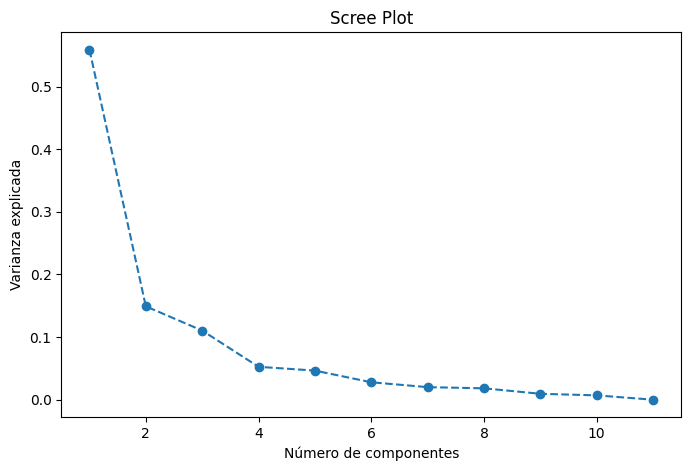

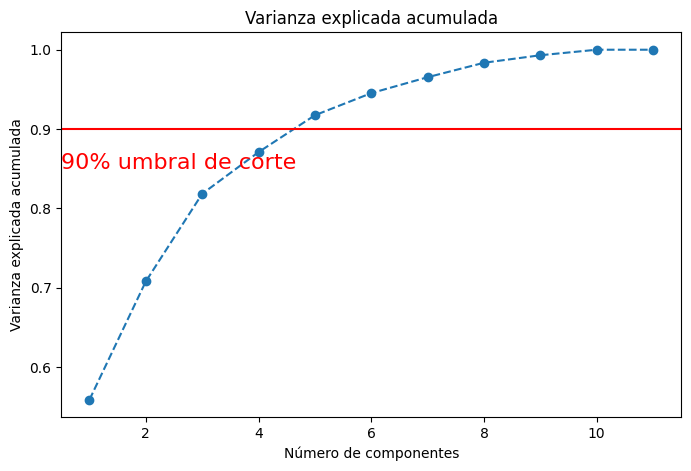

In [93]:
import numpy as np
# Scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada')
plt.show()

# Varianza acumulada
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Gráfico de la varianza acumulada
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.axhline(y=0.9, color='r', linestyle='-')  # línea de corte estabelcer umbral según criterio
plt.text(0.5, 0.85, '90% umbral de corte', color = 'red', fontsize=16)
plt.show()

In [94]:
principal_components_pat = pd.DataFrame(principal_components_pat, columns=[f'PC{i}' for i in range(0, len(df_pca_pat.columns))])
principal_components_pat.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.025969,-0.030445,-0.153724,-0.036993,-0.075051,-0.096660,-0.103219,0.060066,-0.064581,0.005286,-3.766805e-16
1,0.273398,0.567496,0.193871,-0.500282,-0.154257,0.220075,0.762093,-0.401307,0.655004,-0.207516,3.141216e-15
2,-0.972010,0.029417,-0.176183,0.006830,-0.141540,-0.132180,0.026740,0.148739,-0.099615,-0.006972,-6.844545e-16
3,5.219417,-0.009829,-0.563320,0.922806,1.810332,-0.626511,-0.051717,-0.744815,0.484431,0.516605,-7.269050e-16
4,-0.811180,0.330292,0.036191,-0.327779,-0.210100,0.229645,0.277222,-0.144344,0.007053,-0.066821,1.374844e-16


In [95]:
nombres_variables = df_original.columns[columnas_a_extraer]
nombres_variables_cortos = [nombre[:10] for nombre in df_original.columns[columnas_a_extraer]]

In [96]:
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()

# Normalizar los componentes principales
principal_components_pat_norm = scaler.fit_transform(principal_components_pat[['PC0', 'PC1']])

# Normalizar los loadings
loadings_pat_norm = scaler.fit_transform(loadings[['PC0', 'PC1']])

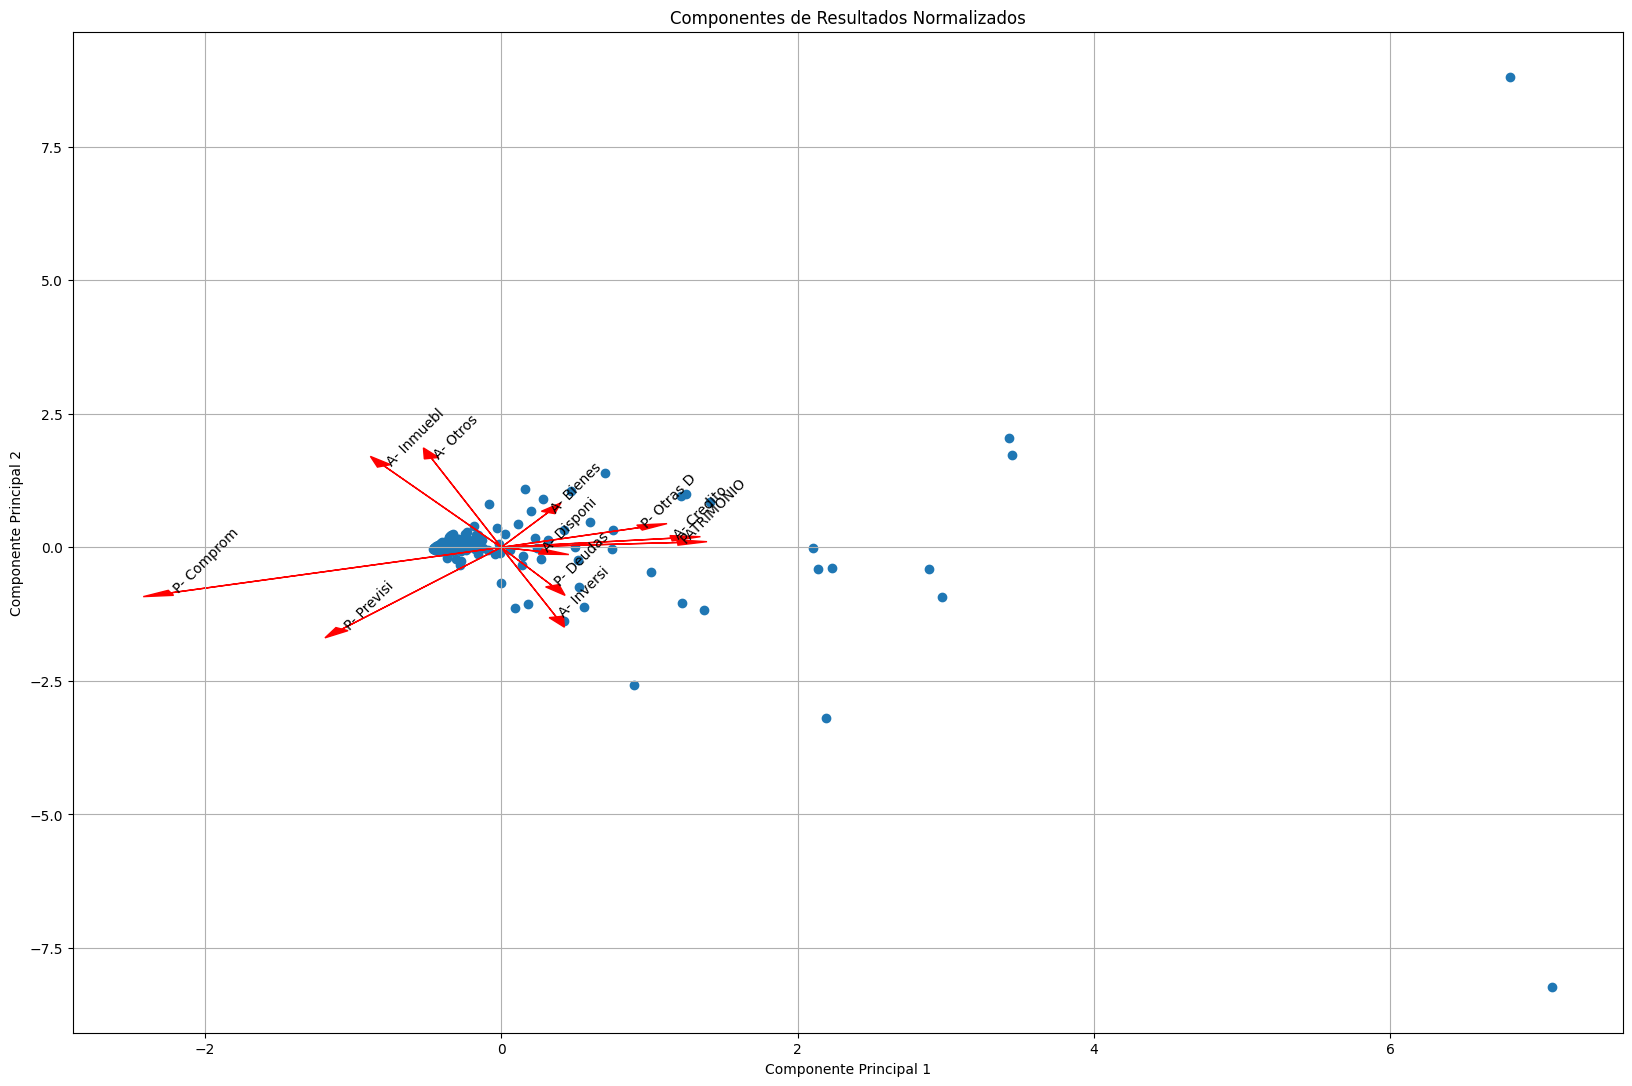

In [101]:
import matplotlib.pyplot as plt
import numpy as np


# Crear el gráfico
fig, ax = plt.subplots(figsize=(20, 13))

# Agregar las observaciones
ax.scatter(principal_components_pat_norm[:, 0], principal_components_pat_norm[:, 1])

# Agregar las variables normalizadas con flechas
for i, (x, y) in enumerate(zip(loadings_pat_norm[:, 0], loadings_pat_norm[:, 1])):
    ax.arrow(0, 0, x, y, head_width=0.1, head_length=0.2, color='red')
    ax.text(x, y, nombres_variables_cortos[i], rotation=45)


# Personalizar el gráfico
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.grid(True)
plt.title('Componentes de Resultados Normalizados')
plt.show()

# PCA para variables resultados


In [102]:
columnas_a_extraer = [59,60,61,63,64,65,66,70,71,73]

In [103]:
df_pca_res = df_original.iloc[:, columnas_a_extraer].abs()

In [104]:
df_pca_res.head()

,SD - PrimasEmitidas,SD - PrimasCedidas,SD - Variacionde RRC,SD - SiniestrosPagados,SD - SiniestrosPagados.1,SD - SiniestrosPagados.2,SD - SiniestrosPagados.3,SD - Gastos deProduccion,SD - Gastos deExplotacion,SD - Gastos de Produccion y Explotacion - Total
0,1.210745e+07,3.449998e+06,1449492.400,2.468312e+05,2835.232,3.796414e+04,1.864714e+05,3.122619e+06,3.715799e+06,5.168774e+06
1,7.749039e+06,3.938316e+04,626384.665,7.698131e+06,0.000,0.000000e+00,1.670975e+07,9.925046e+06,2.517932e+06,1.244298e+07
2,6.294006e+06,2.491436e+06,192736.530,1.277315e+05,24965.821,4.088212e+04,3.564111e+04,9.610538e+05,3.883366e+06,3.707490e+06
3,3.899410e+08,7.884531e+07,1637220.452,2.134700e+08,2936811.548,5.553205e+07,2.920650e+06,7.340331e+07,7.770062e+07,1.361483e+08
4,6.178499e+06,1.869007e+05,185577.965,3.967586e+06,509.980,9.389366e+05,2.579664e+06,2.239526e+06,2.266662e+06,4.506188e+06


In [105]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Suponiendo que df_pca_pat es tu DataFrame
Y = df_pca_res.values

# Estandarizar los datos
scaler = StandardScaler()
Y_scaled = scaler.fit_transform(Y)

In [106]:
#ocultar texto warning
import warnings
warnings.filterwarnings('ignore')

In [107]:
pca = PCA()
principal_components_res = pca.fit_transform(Y_scaled)

In [108]:
# Explicar la varianza por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([6.57665544e-01, 1.37864882e-01, 1.01105657e-01, 4.16126012e-02,
       3.22516459e-02, 1.44155216e-02, 1.22616492e-02, 2.40871863e-03,
       3.63170718e-04, 5.06097479e-05])

In [109]:
principal_components_res

array([[-9.54882303e-01,  4.63383856e-02, -1.50376614e-01, ...,
         1.25298817e-02,  1.08072778e-03, -1.88978153e-02],
       [-6.83769387e-01, -3.74449265e-01, -2.23969787e-01, ...,
        -3.56533813e-01, -4.22313104e-02,  7.78170930e-03],
       [-1.01561034e+00,  2.29857202e-02, -1.93954520e-01, ...,
         1.78362520e-02, -1.72106658e-02, -1.11428891e-02],
       ...,
       [-1.06387604e+00, -1.44484889e-02,  1.38082290e-01, ...,
         2.10229410e-02, -2.07209079e-02,  3.15322687e-03],
       [-1.14396832e+00, -3.33999222e-02, -2.00802777e-01, ...,
         3.32198210e-02, -6.03269360e-03,  2.83391453e-03],
       [-1.14283645e+00, -3.32881130e-02, -1.98381407e-01, ...,
         3.28717071e-02, -6.46698126e-03,  2.85075520e-03]])

In [110]:
loadings_res = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(0, len(df_pca_res.columns))], index=df_pca_res.columns[0:])
loadings_res

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
SD - PrimasEmitidas,0.385895,-0.072415,-0.010659,0.086765,-0.093266,-0.083815,0.018703,0.402792,0.811787,-0.029788
SD - PrimasCedidas,0.238361,0.596788,-0.128725,0.401770,-0.001994,-0.461871,0.409346,0.009681,-0.166053,0.021867
SD - Variacionde RRC,0.058928,0.066060,0.969461,0.218203,0.052078,0.037684,-0.006409,0.000302,-0.022855,-0.000408
SD - SiniestrosPagados,0.364502,-0.253902,-0.068081,0.186992,0.004486,0.207365,-0.041729,0.665995,-0.524139,0.006214
SD - SiniestrosPagados.1,0.326614,-0.122758,-0.008337,-0.210117,0.890851,-0.062151,0.135950,-0.133577,0.015204,-0.000349
SD - SiniestrosPagados.2,0.270711,0.550120,-0.116143,0.150368,0.103838,0.533753,-0.516252,-0.147862,0.056114,0.027953
SD - SiniestrosPagados.3,0.267953,-0.500352,-0.116657,0.618771,-0.092685,0.006326,-0.048010,-0.519900,0.009624,0.006159
SD - Gastos deProduccion,0.363400,0.033268,0.046403,-0.307747,-0.286086,0.418926,0.537403,-0.220680,-0.044048,-0.416157
SD - Gastos deExplotacion,0.365213,-0.012149,0.068529,-0.300400,-0.178609,-0.516247,-0.503763,-0.108993,-0.165394,-0.424397
SD - Gastos de Produccion y Explotacion - Total,0.375147,-0.021490,0.069348,-0.337473,-0.248656,-0.066524,0.020535,-0.153410,-0.073601,0.802793


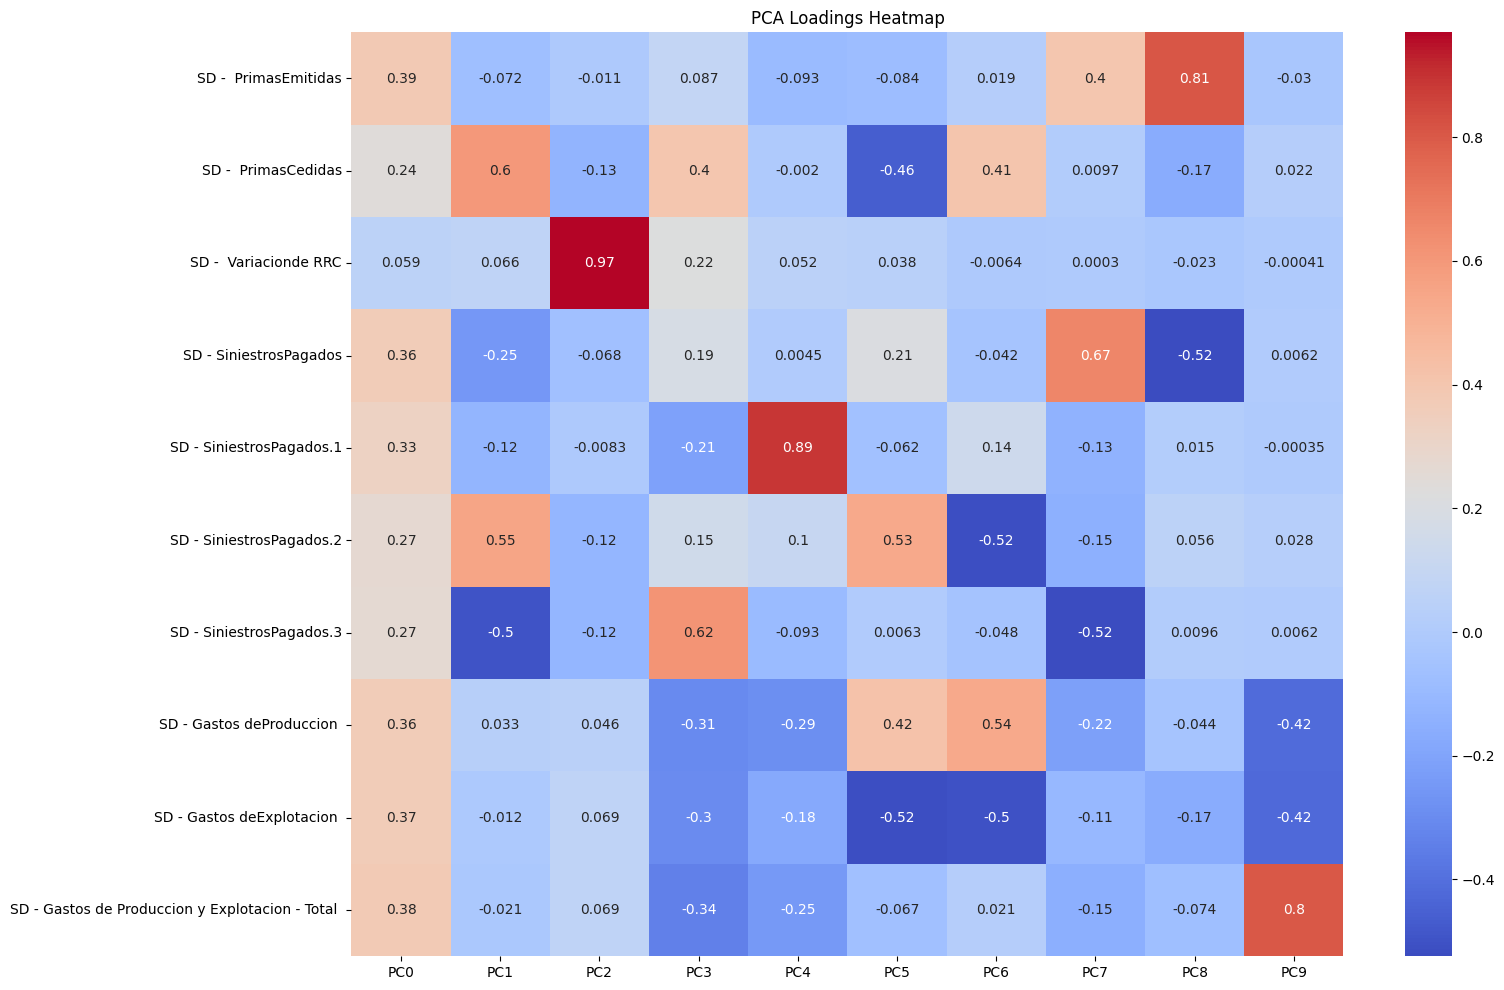

In [111]:
import seaborn as sns

# heatmap de la varianza de los componentes
plt.figure(figsize=(16, 12))
sns.heatmap(loadings_res, annot=True, cmap='coolwarm')
plt.title('PCA Loadings Heatmap')
plt.show()

el modelo será PC0, pero nos interesa el que mayor correlacione con ingresos pero menos con siniestros pagados.

In [112]:
# umbral para el cual extraer las variables
threshold = 0.3

# Buscar las variables de mayor importancia dentro de cada componente
important_features_res = {}
for column in loadings_res.columns:
    important_features_res[column] = loadings_res.index[loadings_res[column].abs() > threshold].tolist()

# obtener el nombre de las variables encoentradas
for pc, features in important_features_res.items():
    print(f"{pc}: {', '.join(features)}")

PC0: SD -  PrimasEmitidas, SD - SiniestrosPagados, SD - SiniestrosPagados.1, SD - Gastos deProduccion , SD - Gastos deExplotacion , SD - Gastos de Produccion y Explotacion - Total 
PC1: SD -  PrimasCedidas, SD - SiniestrosPagados.2, SD - SiniestrosPagados.3
PC2: SD -  Variacionde RRC
PC3: SD -  PrimasCedidas, SD - SiniestrosPagados.3, SD - Gastos deProduccion , SD - Gastos deExplotacion , SD - Gastos de Produccion y Explotacion - Total 
PC4: SD - SiniestrosPagados.1
PC5: SD -  PrimasCedidas, SD - SiniestrosPagados.2, SD - Gastos deProduccion , SD - Gastos deExplotacion 
PC6: SD -  PrimasCedidas, SD - SiniestrosPagados.2, SD - Gastos deProduccion , SD - Gastos deExplotacion 
PC7: SD -  PrimasEmitidas, SD - SiniestrosPagados, SD - SiniestrosPagados.3
PC8: SD -  PrimasEmitidas, SD - SiniestrosPagados
PC9: SD - Gastos deProduccion , SD - Gastos deExplotacion , SD - Gastos de Produccion y Explotacion - Total 


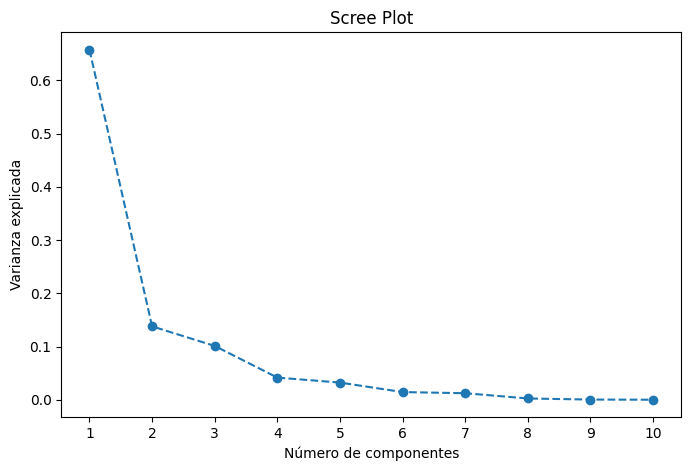

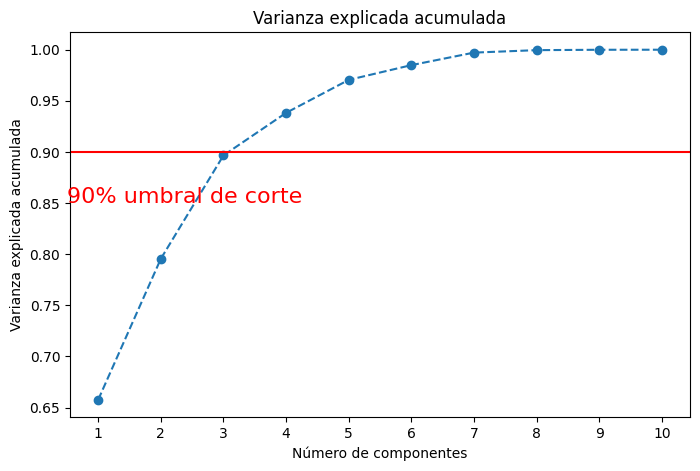

In [113]:
import numpy as np
# Scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1))
plt.show()

# Varianza acumulada
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Gráfico de la varianza acumulada
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.xticks(np.arange(1, len(cumulative_explained_variance) + 1))
plt.axhline(y=0.9, color='r', linestyle='-')  # línea de corte estabelcer umbral según criterio
plt.text(0.5, 0.85, '90% umbral de corte', color = 'red', fontsize=16)
plt.show()

In [114]:
principal_components_res = pd.DataFrame(principal_components_res, columns=[f'PC{i}' for i in range(0, len(df_pca_res.columns))])
principal_components_res.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.954882,0.046338,-0.150377,-0.033626,-0.010150,-0.011004,0.085272,0.012530,0.001081,-0.018898
1,-0.683769,-0.374449,-0.223970,0.209648,-0.162250,0.181513,0.144321,-0.356534,-0.042231,0.007782
2,-1.015610,0.022986,-0.193955,-0.038260,0.026157,-0.024440,0.026785,0.017836,-0.017211,-0.011143
3,5.953206,3.899305,-0.891348,0.131486,-0.403918,1.095208,-1.145935,0.220375,0.068064,-0.025264
4,-0.976901,-0.042405,-0.206585,0.004628,0.011140,0.118577,-0.012233,-0.028467,-0.009576,0.006104


In [115]:
nombres_variables = df_original.columns[columnas_a_extraer]
nombres_variables_cortos = [nombre[:10] for nombre in df_original.columns[columnas_a_extraer]]


In [116]:
print(principal_components_pat.dtypes)

PC0     float64
PC1     float64
PC2     float64
PC3     float64
PC4     float64
PC5     float64
PC6     float64
PC7     float64
PC8     float64
PC9     float64
PC10    float64
dtype: object


In [117]:
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()

# Normalizar los componentes principales
principal_components_res_norm = scaler.fit_transform(principal_components_res[['PC0', 'PC1']])

# Normalizar los loadings
loadings_res_norm = scaler.fit_transform(loadings_res[['PC0', 'PC1']])

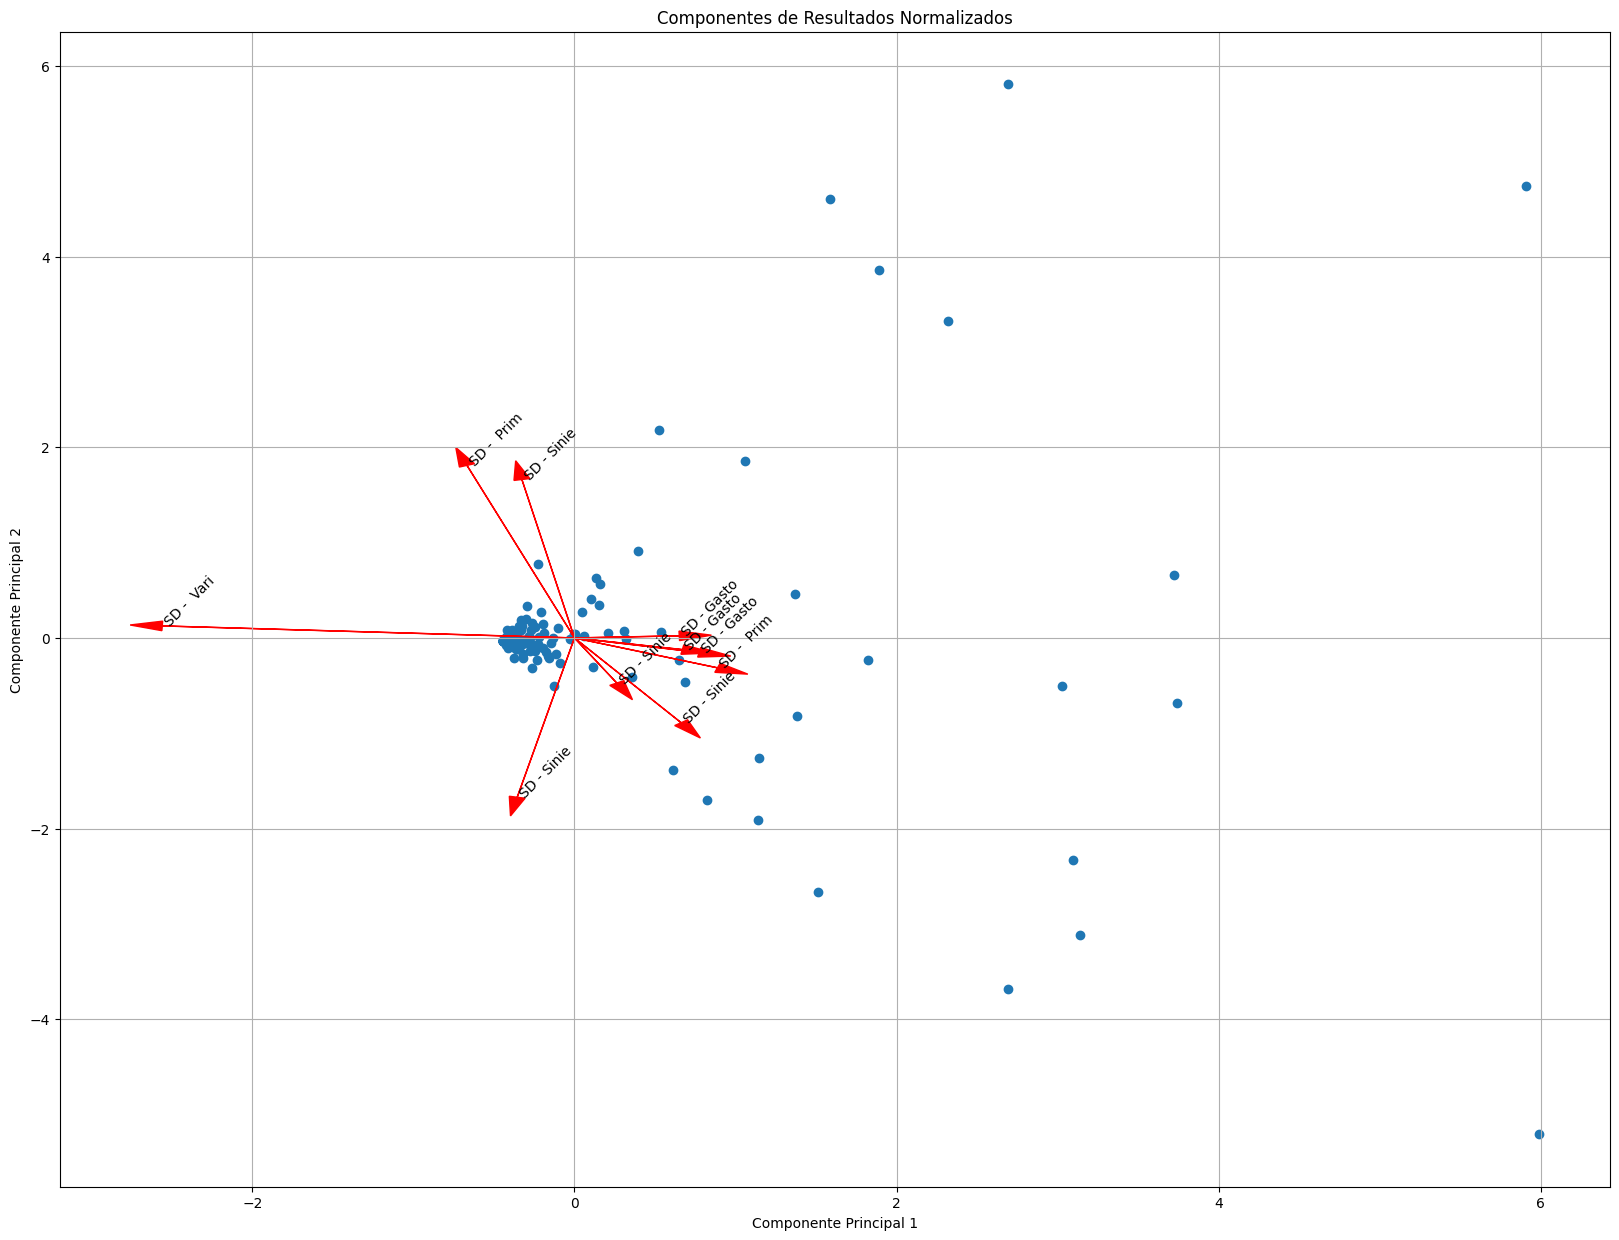

In [118]:
import matplotlib.pyplot as plt
import numpy as np


# Crear el gráfico
fig, ax = plt.subplots(figsize=(20, 15))

# Agregar las observaciones
ax.scatter(principal_components_res_norm[:, 0], principal_components_res_norm[:, 1])

# Agregar las variables normalizadas con flechas
for i, (x, y) in enumerate(zip(loadings_res_norm[:, 0], loadings_res_norm[:, 1])):
    ax.arrow(0, 0, x, y, head_width=0.1, head_length=0.2, color='red')
    ax.text(x, y, nombres_variables_cortos[i], rotation=45)


# Personalizar el gráfico
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.grid(True)
plt.title('Componentes de Resultados Normalizados')
plt.show()

# PCA para variables indicadores


In [119]:
df_original.head()

,Entidad N,Entidad NJ,Entidad Denominacion,SEGMENTO,Rank,TOP,A- Disponibilidades,A- Inversiones,A- Creditos,A- Inmuebles,...,RF - Resultados porTenencia,RF - OtrosIngresos,RF - OtrosEgresos,RF - Gastos deExplotacion yOtros Cargos,RF - RECPAM,RF - TOTAL,RF - ResultadoOperacionesOrdinarias,RF - Resultado OperacionesExtraordinarias,RF - Impuestoa lasGanancias,RF - RESULTADODELEJERCICIO
0,1,A,AFIANZADORA,PM,92,RESTO,7.534390e+04,4.418959e+06,2.538016e+06,0.000000e+00,...,0.000000e+00,0.000,-286023.633,-1441457.503,-3.062344e+06,-2.099534e+06,3.586780e+05,0.0,-2.354916e+05,1.231864e+05
1,2,C,AGROSALTA,PM,113,RESTO,2.256459e+06,6.147431e+07,1.358144e+07,1.764929e+07,...,4.415820e+07,0.000,-837382.362,-330014.242,-6.548793e+07,-1.891490e+07,-1.526299e+07,0.0,0.000000e+00,-1.526299e+07
2,3,A,ALBA,PM,121,RESTO,1.207561e+05,3.055744e+06,9.179537e+05,2.597781e+05,...,3.690407e+06,-1.119,-936868.376,-2514450.999,-2.484058e+06,2.411046e+05,4.484604e+05,0.0,-4.229918e+04,4.061612e+05
3,4,A,ALLIANZ,PM,11,20,1.387707e+07,2.869870e+08,1.256212e+08,7.954588e+06,...,3.352328e+08,357754.610,0.000,-4917388.283,-5.209753e+08,-6.041762e+07,-3.653974e+07,0.0,1.045464e+07,-2.608509e+07
4,5,A,ANTaRTIDA,PM,123,RESTO,1.887429e+05,3.332890e+05,1.188759e+06,8.732468e+06,...,5.113801e+04,-148.153,0.000,-1325125.271,1.112795e+06,9.100645e+05,2.278367e+06,0.0,0.000000e+00,2.278367e+06


In [120]:
columnas_a_extraer = [19,20,21,22,23,24,25,26,27,38,39,40,41,42,43]

In [121]:
df_pca_ind = df_original.iloc[:, columnas_a_extraer].abs()

In [122]:
df_pca_ind.head()

,A - GENERAL,B - GENERAL,C - PATRIMONIAL,D1 - PATRIMONIAL,D2 - PATRIMONIAL,E - PATRIMONIAL,F - PATRIMONIAL,G - SOLVENCIA,H - SOLVENCIA,I - GESTION,J - GESTION,K - GESTION,L - GESTION,M - GESTION,N - GESTION
0,0.0936,40.0,34.704,820.219,820.219,238.139,60.423,129.184,0.000,28.4948,0.2714,25.7909,30.6902,42.6909,1.0174
1,0.0599,5180.0,13.394,355.539,454.001,424.941,78.030,0.000,389.222,0.5082,127.2240,128.0810,32.4935,160.5745,196.9662
2,0.0487,75.0,11.733,975.560,0.000,539.031,42.379,519.548,0.000,39.5843,2.4410,15.2693,61.6994,58.9051,6.4531
3,3.0154,2879.0,26.816,219.796,225.607,184.094,62.959,557.378,26.413,20.2198,48.6295,18.8242,19.9262,34.9151,6.6895
4,0.0478,2229.0,9.594,12.176,215.855,236.712,73.163,248.643,1.250,3.0250,7.2602,36.2471,36.6863,72.9334,36.8757


In [123]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Suponiendo que df_pca_pat es tu DataFrame
Z = df_pca_ind.values

# Estandarizar los datos
scaler = StandardScaler()
Z_scaled = scaler.fit_transform(Z)

In [124]:
#ocultar texto warning
import warnings
warnings.filterwarnings('ignore')

In [125]:
pca = PCA()
principal_components_ind = pca.fit_transform(Z_scaled)

In [126]:
# Explicar la varianza por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([2.06263087e-01, 1.41438222e-01, 1.06051638e-01, 1.04678714e-01,
       8.74450751e-02, 6.61689396e-02, 6.12745488e-02, 5.34074454e-02,
       4.69416348e-02, 4.26038966e-02, 3.53186345e-02, 2.29051901e-02,
       1.63263280e-02, 9.02451970e-03, 1.52127402e-04])

In [127]:
principal_components_ind

array([[ 3.04520011e+00, -1.90738795e+00,  4.24289926e-01, ...,
         5.13437696e-02, -1.17018516e-01, -6.45643955e-02],
       [ 8.74256262e-01, -1.98420142e+00,  8.79693794e-01, ...,
        -1.11200184e+00, -3.77447067e-01,  8.70507230e-02],
       [ 1.65732556e+00, -1.84893761e+00,  4.07602081e-01, ...,
        -1.47446741e+00, -2.64658121e+00, -5.84310067e-02],
       ...,
       [-3.06436295e+00, -5.90168175e-01,  2.11971680e-01, ...,
         3.06890626e-01,  6.88797811e-02,  3.26583894e-03],
       [-1.49258634e+00,  1.16188729e+00,  8.98614750e-01, ...,
         1.54675398e-01,  3.15123097e-02, -2.50115768e-03],
       [-1.32412978e+00,  8.91123846e-01,  1.17646600e+00, ...,
         1.85870526e-01, -2.20603662e-02, -4.29927649e-03]])

In [128]:
loadings_ind = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(0, len(df_pca_ind.columns))], index=df_pca_ind.columns[0:])
loadings_ind

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
A - GENERAL,0.139825,0.375753,0.032294,0.390315,-0.331663,-0.037290,0.262539,-0.158754,0.047454,-0.040063,0.141819,-0.674665,-0.026902,0.020347,-0.008308
B - GENERAL,0.049858,0.425353,0.109862,0.413334,-0.282124,-0.114469,0.157426,0.001582,-0.036840,-0.099904,0.030609,0.708891,-0.036504,0.006265,0.004319
C - PATRIMONIAL,0.421990,-0.067296,-0.360847,0.073931,0.030821,0.134275,-0.075352,-0.144533,0.045980,-0.205556,0.178372,0.079004,0.741199,-0.066077,-0.002079
D1 - PATRIMONIAL,0.333174,-0.309322,0.326017,0.222711,0.040882,-0.280675,-0.143223,-0.200019,0.023368,0.111682,-0.018077,0.002885,-0.113216,-0.685687,0.010878
D2 - PATRIMONIAL,0.349552,-0.292142,0.305240,0.263931,0.104852,-0.241235,-0.128735,-0.068603,-0.053745,0.181763,-0.042429,0.001363,0.036442,0.707133,-0.008646
E - PATRIMONIAL,0.183778,-0.236624,0.238430,-0.102697,-0.047767,-0.111626,0.452500,0.682562,-0.030368,-0.325855,0.206644,-0.039826,0.063544,-0.044925,0.001306
F - PATRIMONIAL,-0.381122,0.073315,0.380145,0.005693,-0.026443,-0.052287,0.176134,0.082509,0.039013,0.520791,-0.090975,-0.026090,0.611466,-0.089134,0.005211
G - SOLVENCIA,-0.057830,-0.146297,0.326884,-0.337870,-0.218286,0.085316,0.282479,-0.547004,-0.441976,-0.330186,-0.067804,0.040702,0.080961,0.055909,-0.002638
H - SOLVENCIA,-0.104800,-0.162746,0.373841,0.177210,-0.029769,0.549751,-0.063387,-0.078990,0.620947,-0.285697,-0.088148,0.030035,-0.006694,0.045378,-0.005102
I - GESTION,0.231363,-0.034491,-0.229096,-0.248307,0.059396,-0.207662,0.585841,-0.231463,0.493743,0.191216,-0.290885,0.105253,-0.086872,0.043276,0.047399


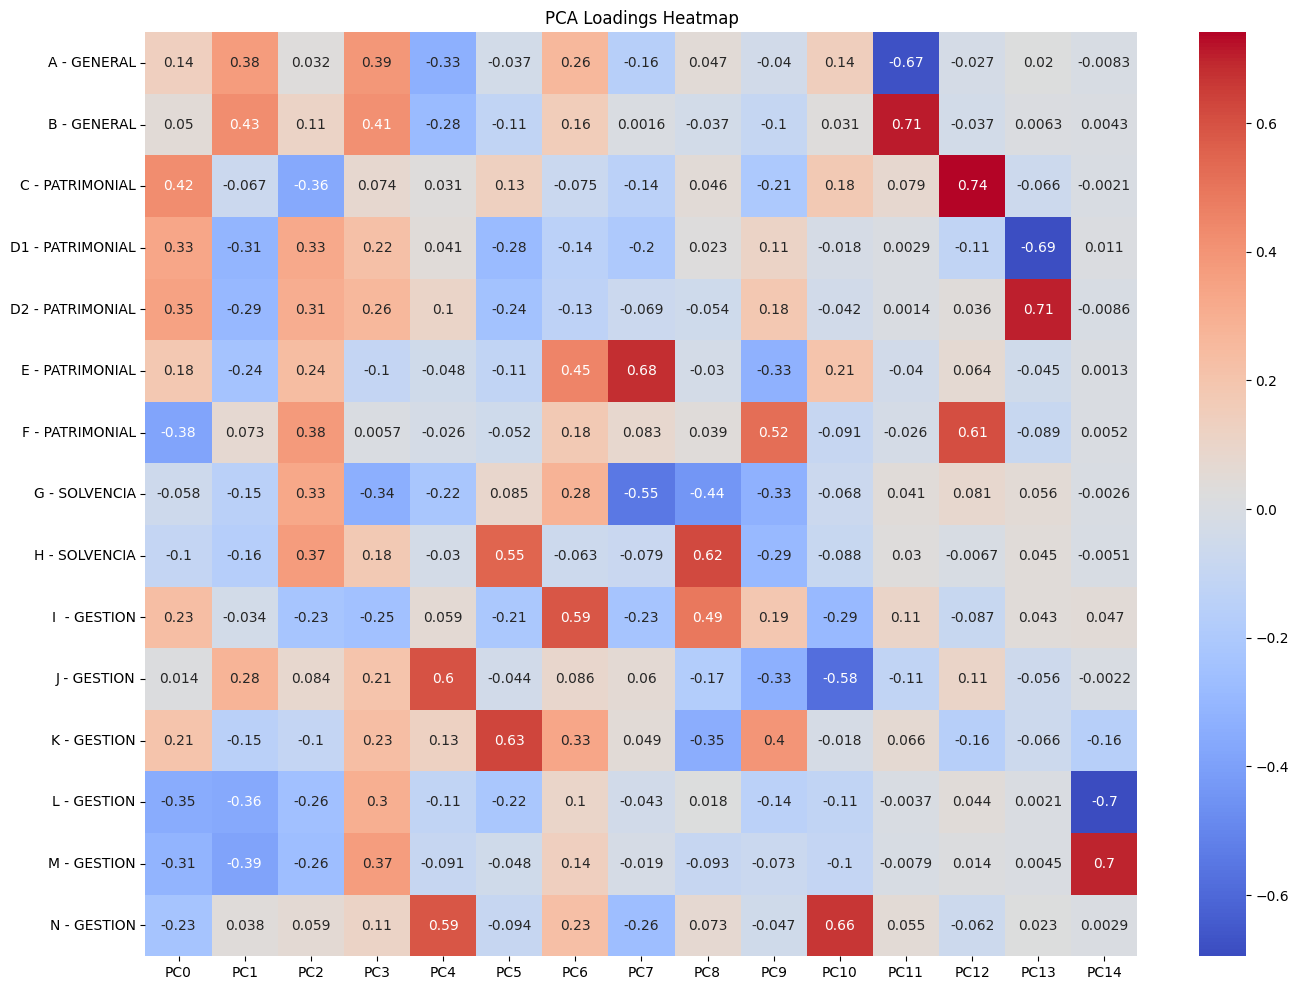

In [129]:
import seaborn as sns

# heatmap de la varianza de los componentes
plt.figure(figsize=(16, 12))
sns.heatmap(loadings_ind, annot=True, cmap='coolwarm')
plt.title('PCA Loadings Heatmap')
plt.show()

el modelo será PC0, pero nos interesa el que mayor correlacione con ingresos pero menos con siniestros pagados.

In [130]:
# umbral para el cual extraer las variables
threshold = 0.5

# Buscar las variables de mayor importancia dentro de cada componente
important_features_ind = {}
for column in loadings_ind.columns:
    important_features_ind[column] = loadings_ind.index[loadings_ind[column].abs() > threshold].tolist()

# obtener el nombre de las variables encoentradas
for pc, features in important_features_ind.items():
    print(f"{pc}: {', '.join(features)}")

PC0: 
PC1: 
PC2: 
PC3: 
PC4: J - GESTION, N - GESTION
PC5: H - SOLVENCIA, K - GESTION
PC6: I  - GESTION
PC7: E - PATRIMONIAL, G - SOLVENCIA
PC8: H - SOLVENCIA
PC9: F - PATRIMONIAL
PC10: J - GESTION, N - GESTION
PC11: A - GENERAL, B - GENERAL
PC12: C - PATRIMONIAL, F - PATRIMONIAL
PC13: D1 - PATRIMONIAL, D2 - PATRIMONIAL
PC14: L - GESTION, M - GESTION


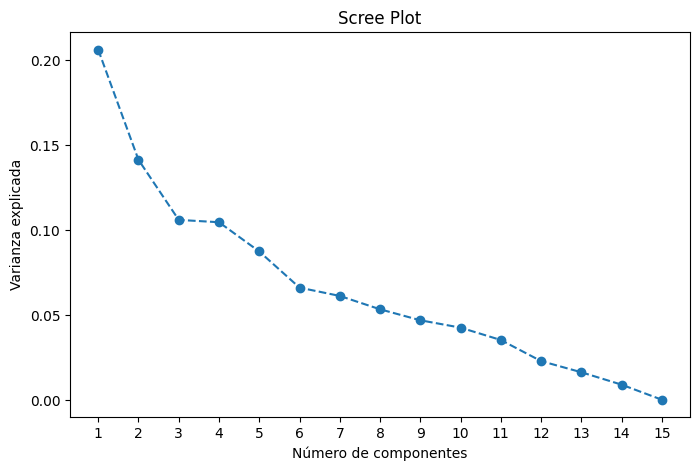

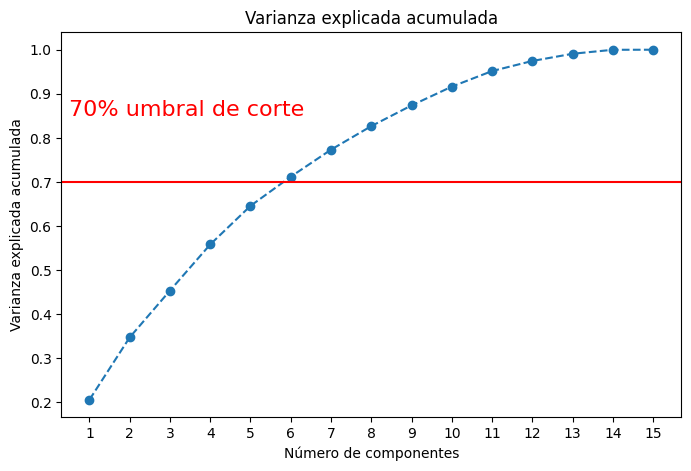

In [139]:
import numpy as np
# Scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1))
plt.show()

# Varianza acumulada
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Gráfico de la varianza acumulada
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.xticks(np.arange(1, len(cumulative_explained_variance) + 1))
plt.axhline(y=0.7, color='r', linestyle='-')  # línea de corte estabelcer umbral según criterio
plt.text(0.5, 0.85, '70% umbral de corte', color = 'red', fontsize=16)
plt.show()

In [132]:
principal_components_ind = pd.DataFrame(principal_components_ind, columns=[f'PC{i}' for i in range(0, len(df_pca_ind.columns))])
principal_components_ind.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,3.045200,-1.907388,0.424290,0.702466,0.343616,-1.107560,-0.461287,-0.571717,0.324076,1.573624,0.011056,0.308103,0.051344,-0.117019,-0.064564
1,0.874256,-1.984201,0.879694,4.192797,3.297083,5.322518,2.737981,1.142111,-1.320334,2.006676,-0.425582,0.736528,-1.112002,-0.377447,0.087051
2,1.657326,-1.848938,0.407602,-0.874482,-0.466391,-1.385416,1.137891,-0.412428,0.242067,-0.307529,-0.124852,0.256350,-1.474467,-2.646581,-0.058431
3,1.203712,0.972474,0.116987,0.214714,-0.686943,0.043135,0.945873,-1.165165,-0.365341,-0.236716,-0.165771,-1.274780,0.184619,0.022501,-0.008547
4,-0.343638,-0.195378,-0.277972,-0.052590,-0.032185,0.854613,0.274457,0.577409,-0.900030,1.097905,0.298307,0.277192,-0.479524,0.421490,0.026664


In [133]:
nombres_variables = df_original.columns[columnas_a_extraer]



In [134]:
print(principal_components_ind.dtypes)

PC0     float64
PC1     float64
PC2     float64
PC3     float64
PC4     float64
PC5     float64
PC6     float64
PC7     float64
PC8     float64
PC9     float64
PC10    float64
PC11    float64
PC12    float64
PC13    float64
PC14    float64
dtype: object


In [135]:
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()

# Normalizar los componentes principales
principal_components_ind_norm = scaler.fit_transform(principal_components_ind[['PC0', 'PC1']])

# Normalizar los loadings
loadings_ind_norm = scaler.fit_transform(loadings_ind[['PC0', 'PC1']])

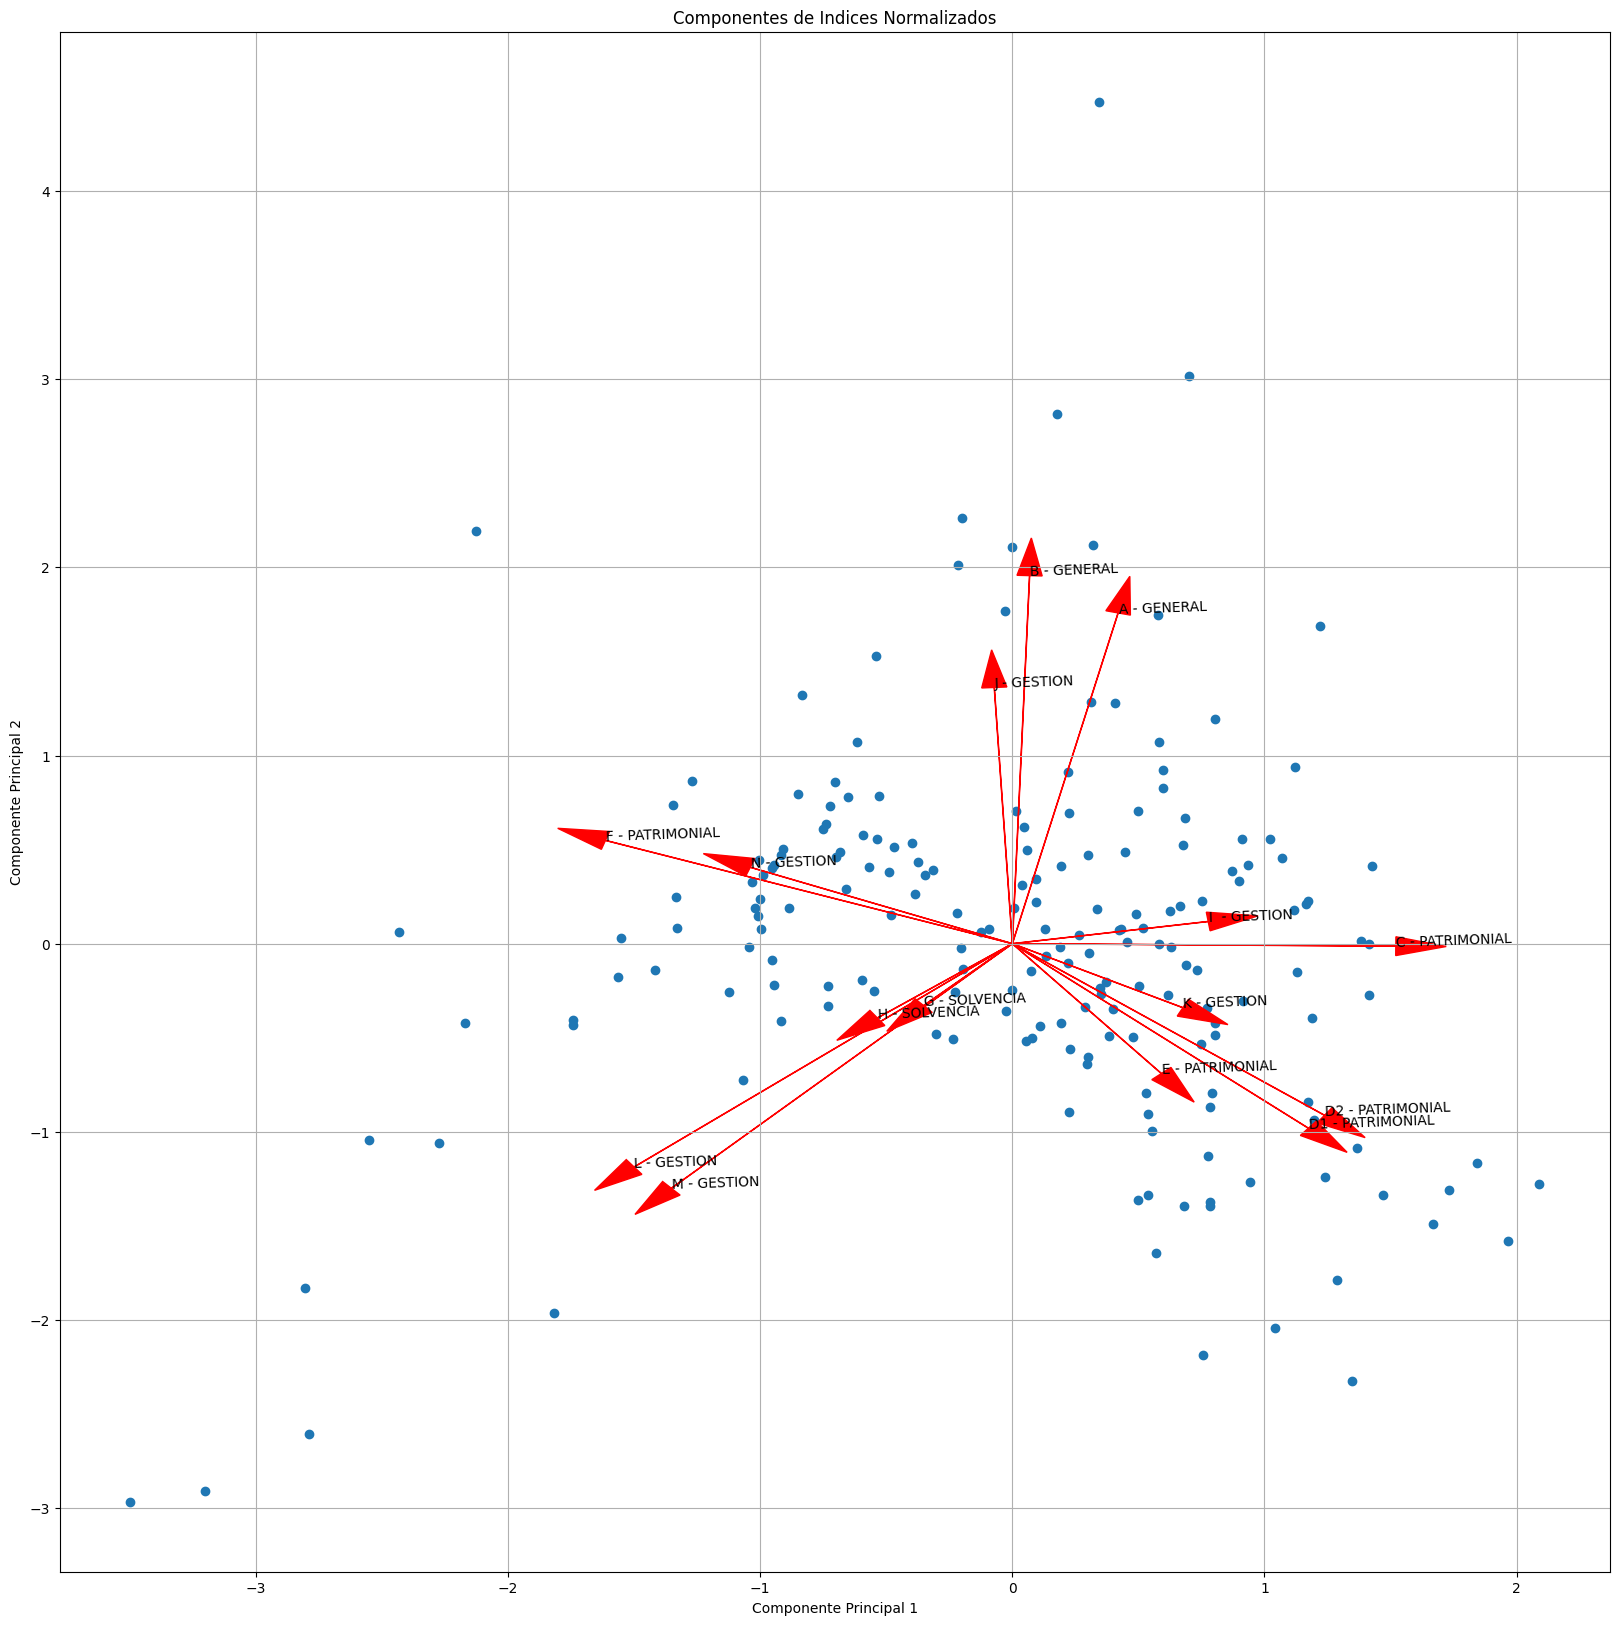

In [138]:
import matplotlib.pyplot as plt
import numpy as np


# Crear el gráfico
fig, ax = plt.subplots(figsize=(20, 20))

# Agregar las observaciones
ax.scatter(principal_components_ind_norm[:, 0], principal_components_ind_norm[:, 1])

# Agregar las variables normalizadas con flechas
for i, (x, y) in enumerate(zip(loadings_ind_norm[:, 0], loadings_ind_norm[:, 1])):
    ax.arrow(0, 0, x, y, head_width=0.1, head_length=0.2, color='red')
    ax.text(x, y, nombres_variables[i], rotation=2)


# Personalizar el gráfico
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.grid(True)
plt.title('Componentes de Indices Normalizados')
plt.show()

#ANALISIS DE CLUSTERS

### Armado del DF a trabajar

In [ ]:
extraer_orginal = [0,1,3,4,5,19,20]
df_cluster = df_original.iloc[:,extraer_orginal]
#df_cluster['PC0_PAT'] = principal_components_pat["PC0"]
df_cluster['PC6_PAT'] = principal_components_pat["PC6"]
#df_cluster['PC0_RES'] = principal_components_res["PC0"]
df_cluster['PC8_RES'] = principal_components_res["PC8"]
df_cluster.head()

,Entidad N,Entidad NJ,SEGMENTO,Rank,TOP,%ProduccionTotal,CantidaddeJuicios,PC6_PAT,PC8_RES
0,1,A,PM,92,RESTO,0.0936,40.0,-0.103219,0.001081
1,2,C,PM,113,RESTO,0.0599,5180.0,0.762093,-0.042231
2,3,A,PM,121,RESTO,0.0487,75.0,0.026740,-0.017211
3,4,A,PM,11,20,3.0154,2879.0,-0.051717,0.068064
4,5,A,PM,123,RESTO,0.0478,2229.0,0.277222,-0.009576


In [ ]:
df_cluster.head()

,Entidad N,Entidad NJ,SEGMENTO,Rank,TOP,%ProduccionTotal,CantidaddeJuicios,PC6_PAT,PC8_RES
0,1,A,PM,92,RESTO,0.0936,40.0,-0.103219,0.001081
1,2,C,PM,113,RESTO,0.0599,5180.0,0.762093,-0.042231
2,3,A,PM,121,RESTO,0.0487,75.0,0.026740,-0.017211
3,4,A,PM,11,20,3.0154,2879.0,-0.051717,0.068064
4,5,A,PM,123,RESTO,0.0478,2229.0,0.277222,-0.009576


In [ ]:
print(df_cluster.dtypes)

Entidad N               int64
Entidad NJ             object
SEGMENTO               object
Rank                    int64
TOP                    object
%ProduccionTotal      float64
CantidaddeJuicios     float64
PC6_PAT               float64
PC8_RES               float64
dtype: object


In [ ]:
#e) A las de tipo Object, recategorícelas a categorías numéricas.
cols_object = df_cluster.select_dtypes(include=['object']).columns.tolist() #Contador
for col in cols_object:
    df_cluster[col] = df_cluster[col].astype('category').cat.codes #Recategorización

print(f"Recategorización de columnas de tipo Object a categorías numéricas:\n")
print(f"Número de columnas de tipo Object recategorizadas: {len(cols_object)}")
print(f"Número de columnas numéricas: {df_cluster.select_dtypes(include=['number']).shape[1]}")

Recategorización de columnas de tipo Object a categorías numéricas:

Número de columnas de tipo Object recategorizadas: 3
Número de columnas numéricas: 9


In [ ]:
df_cluster.head()

,Entidad N,Entidad NJ,SEGMENTO,Rank,TOP,%ProduccionTotal,CantidaddeJuicios,PC6_PAT,PC8_RES
0,1,0,1,92,3,0.0936,40.0,-0.103219,0.001081
1,2,1,1,113,3,0.0599,5180.0,0.762093,-0.042231
2,3,0,1,121,3,0.0487,75.0,0.026740,-0.017211
3,4,0,1,11,1,3.0154,2879.0,-0.051717,0.068064
4,5,0,1,123,3,0.0478,2229.0,0.277222,-0.009576


In [ ]:
df_cluster_escal = df_cluster[['PC6_PAT', 'PC8_RES']].to_numpy()
df_cluster_escal

array([[-1.03218645e-01,  1.08072778e-03],
       [ 7.62092680e-01, -4.22313104e-02],
       [ 2.67403493e-02, -1.72106658e-02],
       [-5.17170653e-02,  6.80643456e-02],
       [ 2.77222445e-01, -9.57633230e-03],
       [ 1.68016950e-01, -1.37076464e-02],
       [-4.97221788e-02, -1.19561747e-02],
       [ 1.79150691e-02, -1.89981735e-02],
       [ 7.54124220e-02, -6.90556090e-03],
       [ 3.98668101e-02, -1.08446091e-02],
       [-3.87182885e-01, -3.41824135e-02],
       [-4.52942236e-02, -2.27814108e-03],
       [ 1.10868480e-01,  3.19469657e-02],
       [-3.16879021e-01, -9.82070906e-02],
       [-4.54470570e-02, -7.45491446e-03],
       [-9.16643717e-02,  7.12980041e-02],
       [ 1.61763560e+00, -1.98161322e-01],
       [-8.78835436e-02,  1.12198481e-02],
       [-3.87762749e-02,  1.84011388e-02],
       [ 2.41550641e-01,  5.22066520e-02],
       [ 1.81998848e+00, -1.44674119e-01],
       [ 1.54092107e-01, -3.57783471e-03],
       [ 2.06910252e-01, -2.43037045e-03],
       [-1.

## Selección óptima de Cluster

### Análisis Jerárquico

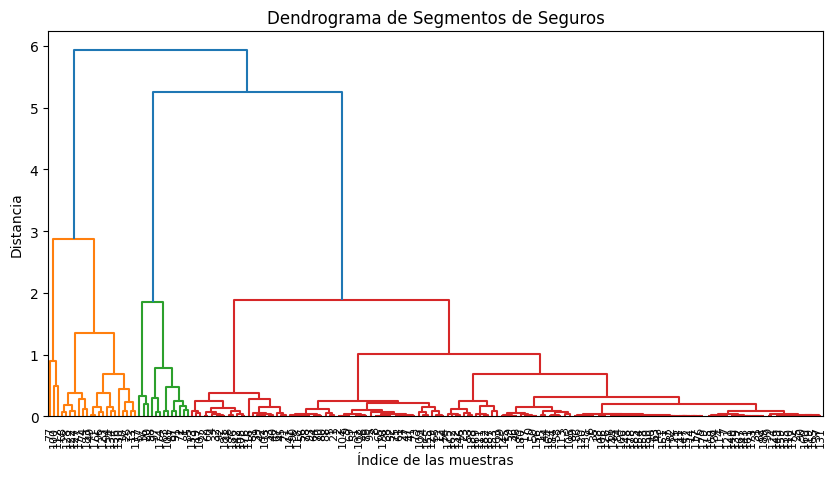

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


# Seleccionamos las columnas numéricas (componentes principales)
X = df_cluster_escal  # Reemplaza 'CP1', 'CP2', etc. con los nombres reales

# Realizamos el clustering jerárquico utilizando el método de Ward
Z = linkage(X, 'ward')

# Visualizamos el dendrograma
plt.figure(figsize=(10, 5))
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.title('Dendrograma de Segmentos de Seguros')
plt.xlabel('Índice de las muestras')
plt.ylabel('Distancia')
plt.show()

In [ ]:
df_cluster.head()

,Entidad N,Entidad NJ,SEGMENTO,Rank,TOP,%ProduccionTotal,CantidaddeJuicios,PC6_PAT,PC8_RES
0,1,0,1,92,3,0.0936,40.0,-0.103219,0.001081
1,2,1,1,113,3,0.0599,5180.0,0.762093,-0.042231
2,3,0,1,121,3,0.0487,75.0,0.026740,-0.017211
3,4,0,1,11,1,3.0154,2879.0,-0.051717,0.068064
4,5,0,1,123,3,0.0478,2229.0,0.277222,-0.009576


In [ ]:
df_cluster ['cat_comb'] = df_cluster['Entidad NJ'].astype(str) + '_' +  df_cluster['SEGMENTO'].astype(str)+ '_' +  df_cluster['TOP'].astype(str)

Text(0, 0.5, 'Distancia')

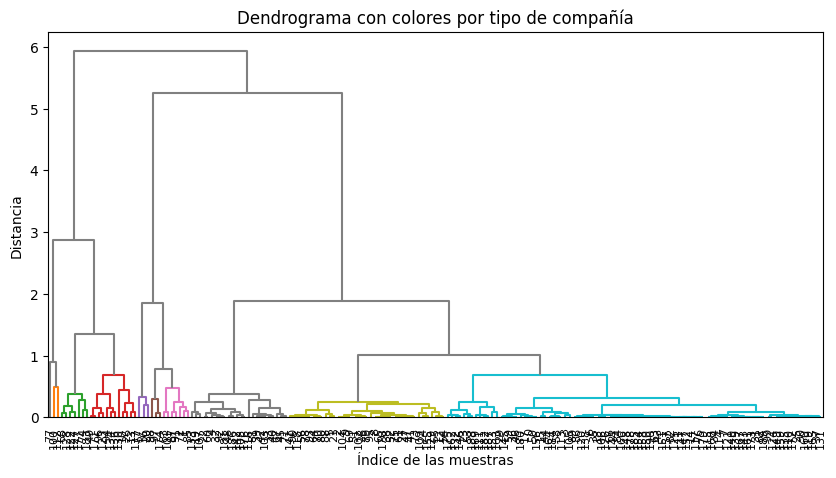

In [ ]:
# Codificar la variable "tipo_compañia"
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cluster['cat_comb'] = le.fit_transform(df_cluster['cat_comb'])

# Crear un nuevo DataFrame con las variables numéricas y la codificada
X_encoded = df_cluster[['PC6_PAT', 'PC8_RES', 'cat_comb']]

# Asignar colores a las hojas del dendrograma según la categoría
plt.figure(figsize=(10, 5))
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.,
           color_threshold=0.7,  #
           above_threshold_color='grey')
plt.title('Dendrograma con colores por tipo de compañía')
plt.xlabel('Índice de las muestras')
plt.ylabel('Distancia')

### Método del codo

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np


def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters=k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0

        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += np.sum((points[i] - curr_center) ** 2)

        sse.append(curr_sse)
    return sse


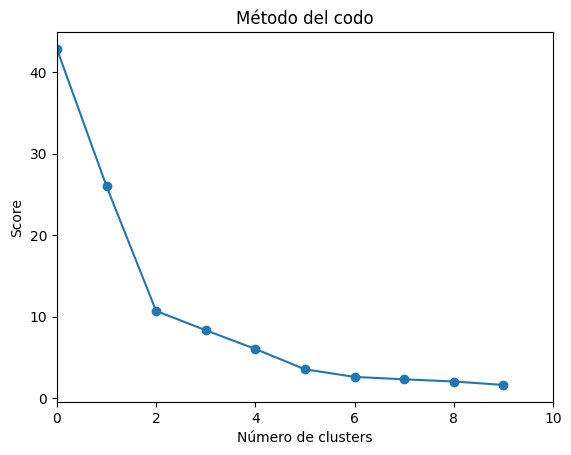

In [ ]:
plt.plot(range(0,10), calculate_WSS(df_cluster_escal, 10), marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Score')
plt.xlim(0,10)
plt.show()

4 clusters es  un punto de inflexión donde la disminución del score se hace menos pronunciada

## Aplicación de KMeans con k=3

In [ ]:
#KMeans con 4 cluster
def doKmeans(X, nclust=3):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(df_cluster_escal, 3)
kmeans = pd.DataFrame(clust_labels) #clusters
datas=pd.DataFrame(df_cluster)
datas.columns=df_cluster.columns
datas.insert((df_cluster.shape[1]),'kmeans',kmeans)

In [ ]:
datas.head()

,Entidad N,Entidad NJ,SEGMENTO,Rank,TOP,%ProduccionTotal,CantidaddeJuicios,PC6_PAT,PC8_RES,cat_comb,kmeans
0,1,0,1,92,3,0.0936,40.0,-0.103219,0.001081,7,1
1,2,1,1,113,3,0.0599,5180.0,0.762093,-0.042231,15,2
2,3,0,1,121,3,0.0487,75.0,0.026740,-0.017211,7,1
3,4,0,1,11,1,3.0154,2879.0,-0.051717,0.068064,5,1
4,5,0,1,123,3,0.0478,2229.0,0.277222,-0.009576,7,1


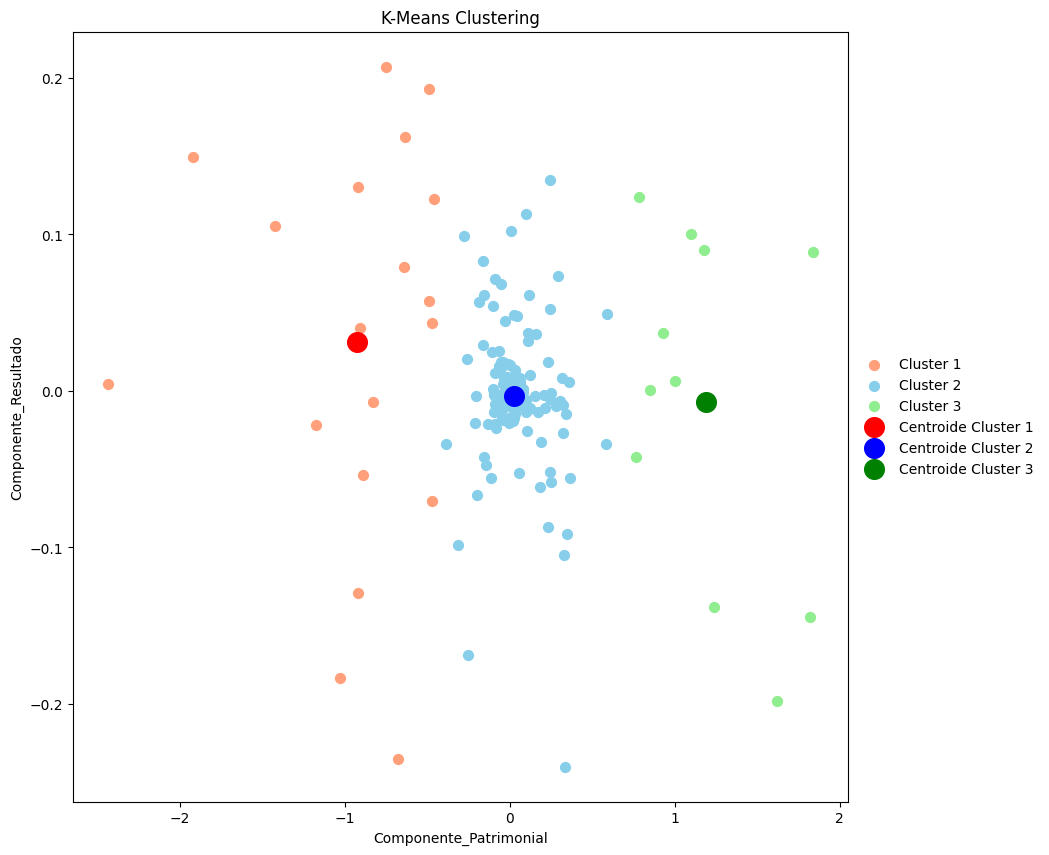

In [ ]:
# Gráfico de clusters
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Define colors for each cluster
#colors = ['red', 'blue', 'green', 'grey']

ax.scatter(datas[datas['kmeans']==0]['PC6_PAT'],datas[datas['kmeans']==0]['PC8_RES'],c='lightsalmon',s=50, label='Cluster 1')
ax.scatter(datas[datas['kmeans']==1]['PC6_PAT'],datas[datas['kmeans']==1]['PC8_RES'],c='skyblue',s=50, label='Cluster 2')
ax.scatter(datas[datas['kmeans']==2]['PC6_PAT'],datas[datas['kmeans']==2]['PC8_RES'],c='lightgreen',s=50, label='Cluster 3')
#ax.scatter(datas[datas['kmeans']==3]['PC0_PAT'],datas[datas['kmeans']==3]['PC1_PAT'],c='yellow',s=50, label='Cluster 4')
#ax.scatter(datas[datas['kmeans']==4]['PC0_PAT'],datas[datas['kmeans']==4]['PC1_PAT'],c='lightgrey',s=50, label='Cluster 5')
plt.scatter(cent[:, 0][0], cent[:, 1][0], s=200, c='red', label = 'Centroide Cluster 1')
plt.scatter(cent[:, 0][1], cent[:, 1][1], s=200, c='blue', label = 'Centroide Cluster 2')
plt.scatter(cent[:, 0][2], cent[:, 1][2], s=200, c='green', label = 'Centroide Cluster 3')
#plt.scatter(cent[:, 0][3], cent[:, 1][3], s=200, c='yellow', label = 'Centroide Cluster 4')
#plt.scatter(cent[:, 0][4], cent[:, 1][4], s=200, c='grey', label = 'Centroide Cluster 5')

ax.set_title('K-Means Clustering')
ax.set_xlabel('Componente_Patrimonial')
ax.set_ylabel('Componente_Resultado')

plt.legend(ncol=1, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

In [ ]:
#Armar la categoria combinada
datas ['cat_comb'] = datas['Entidad NJ'].astype(str) + '_' +  datas['SEGMENTO'].astype(str)+ '_' +  datas['TOP'].astype(str)

In [ ]:
datas.head()

,Entidad N,Entidad NJ,SEGMENTO,Rank,TOP,%ProduccionTotal,CantidaddeJuicios,PC6_PAT,PC8_RES,cat_comb,kmeans
0,1,0,1,92,3,0.0936,40.0,-0.103219,0.001081,0_1_3,1
1,2,1,1,113,3,0.0599,5180.0,0.762093,-0.042231,1_1_3,2
2,3,0,1,121,3,0.0487,75.0,0.026740,-0.017211,0_1_3,1
3,4,0,1,11,1,3.0154,2879.0,-0.051717,0.068064,0_1_1,1
4,5,0,1,123,3,0.0478,2229.0,0.277222,-0.009576,0_1_3,1


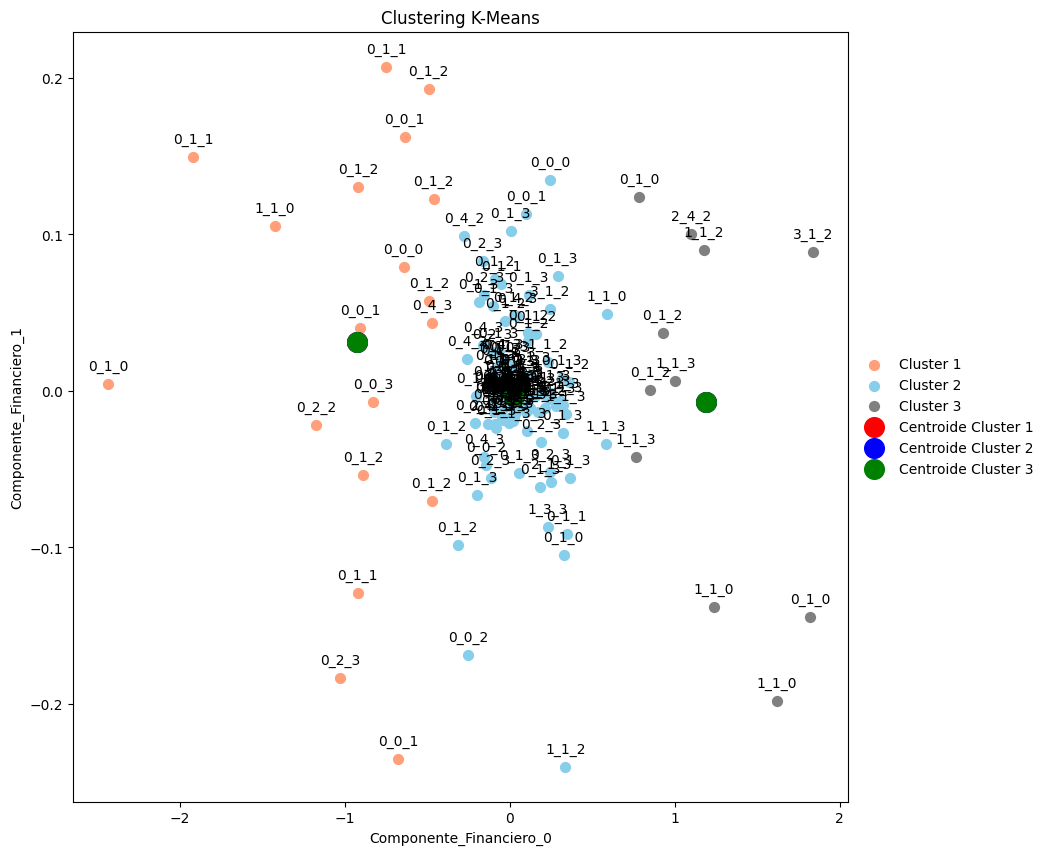

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Extrae los datos de cada cluster según la columna 'label'
# Asegúrate de que 'label' sea el nombre correcto de tu columna de etiquetas
cluster1_data = datas[datas['kmeans'] == 0]
cluster2_data = datas[datas['kmeans'] == 1]
cluster3_data = datas[datas['kmeans'] == 2]
#cluster4_data = datas[datas['kmeans'] == 3]

# Obtén las etiquetas de cada cluster (asumiendo que existe una columna 'your_label_column')
# Reemplaza 'your_label_column' con el nombre real de tu columna de etiquetas

cluster1_labels = cluster1_data['cat_comb']
cluster2_labels = cluster2_data['cat_comb']
cluster3_labels = cluster3_data['cat_comb']


clusters_data = [
    (cluster1_data, cluster1_labels),
    (cluster2_data, cluster2_labels),
    (cluster3_data, cluster3_labels)
]

# Crea el gráfico de dispersión
fig, ax = plt.subplots(figsize=(10, 10))

# Define los colores para cada cluster
colores = ['lightsalmon', 'skyblue', 'grey']

# Iterar sobre los clusters y agregarlos al gráfico
for i, (data, labels) in enumerate(clusters_data):
    ax.scatter(
        data['PC6_PAT'],
        data['PC8_RES'],
        c=colores[i],
        s=50,
        label=f'Cluster {i+1}'  # Usar f-strings para formatear la etiqueta
    )

    # Agregar etiquetas a los puntos
    for j, (x, y, label) in enumerate(zip(data['PC6_PAT'], data['PC8_RES'], labels)):
        ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')


# Grafica los centroides (asumiendo que 'cent' es un array NumPy con los centroides)
ax.scatter(cent[:, 0], cent[:, 1], s=200, c='red', label='Centroide Cluster 1')
ax.scatter(cent[:, 0], cent[:, 1], s=200, c='blue', label='Centroide Cluster 2')
ax.scatter(cent[:, 0], cent[:, 1], s=200, c='green', label='Centroide Cluster 3')
#ax.scatter(cent[:, 0], cent[:, 1], s=200, c='yellow', label='Centroide Cluster 4')

# Personaliza el gráfico
ax.set_title('Clustering K-Means')
ax.set_xlabel('Componente_Financiero_0')
ax.set_ylabel('Componente_Financiero_1')
plt.legend(ncol=1, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

In [ ]:
datas.head()

#MANOVA

## Armado dataframe

In [ ]:
datas.head()

,Entidad N,Entidad NJ,SEGMENTO,Rank,TOP,%ProduccionTotal,CantidaddeJuicios,PC6_PAT,PC8_RES,cat_comb,kmeans
0,1,0,1,92,3,0.0936,40.0,-0.103219,0.001081,0_1_3,1
1,2,1,1,113,3,0.0599,5180.0,0.762093,-0.042231,1_1_3,2
2,3,0,1,121,3,0.0487,75.0,0.026740,-0.017211,0_1_3,1
3,4,0,1,11,1,3.0154,2879.0,-0.051717,0.068064,0_1_1,1
4,5,0,1,123,3,0.0478,2229.0,0.277222,-0.009576,0_1_3,1


In [ ]:
extraer_orginal = [0,1,3,4,5,19,20]
df_manova = df_original.iloc[:,extraer_orginal]
df_manova['PC0_PAT'] = principal_components_pat["PC0"]
df_manova['PC6_PAT'] = principal_components_pat["PC6"]
df_manova['PC0_RES'] = principal_components_res["PC0"]
df_manova['PC8_RES'] = principal_components_res["PC8"]
df_manova ['cat_comb']= datas['cat_comb']
df_manova ['kmeans']= datas['kmeans']
df_manova.head()

,Entidad N,Entidad NJ,SEGMENTO,Rank,TOP,%ProduccionTotal,CantidaddeJuicios,PC0_PAT,PC6_PAT,PC0_RES,PC8_RES,cat_comb,kmeans
0,1,A,PM,92,RESTO,0.0936,40.0,-1.025969,-0.103219,-0.954882,0.001081,0_1_3,1
1,2,C,PM,113,RESTO,0.0599,5180.0,0.273398,0.762093,-0.683769,-0.042231,1_1_3,2
2,3,A,PM,121,RESTO,0.0487,75.0,-0.972010,0.026740,-1.015610,-0.017211,0_1_3,1
3,4,A,PM,11,20,3.0154,2879.0,5.219417,-0.051717,5.953206,0.068064,0_1_1,1
4,5,A,PM,123,RESTO,0.0478,2229.0,-0.811180,0.277222,-0.976901,-0.009576,0_1_3,1


In [ ]:
#LIBRERIAS
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.multivariate.manova import MANOVA


In [ ]:
df_manova = df_manova.rename(columns={'Entidad NJ': 'Tipo',
                                            'SEGMENTO': 'Segmento',
                                            'TOP': 'Top_Categoria',
                                           'CantidaddeJuicios ':'Juicios' })
df_manova.head()

,Entidad N,Tipo,Segmento,Rank,Top_Categoria,%ProduccionTotal,Juicios,PC0_PAT,PC6_PAT,PC0_RES,PC8_RES,cat_comb,kmeans
0,1,A,PM,92,RESTO,0.0936,40.0,-1.025969,-0.103219,-0.954882,0.001081,0_1_3,1
1,2,C,PM,113,RESTO,0.0599,5180.0,0.273398,0.762093,-0.683769,-0.042231,1_1_3,2
2,3,A,PM,121,RESTO,0.0487,75.0,-0.972010,0.026740,-1.015610,-0.017211,0_1_3,1
3,4,A,PM,11,20,3.0154,2879.0,5.219417,-0.051717,5.953206,0.068064,0_1_1,1
4,5,A,PM,123,RESTO,0.0478,2229.0,-0.811180,0.277222,-0.976901,-0.009576,0_1_3,1


## Modelo Manova Variables Principales

In [ ]:
# Crear el modelo MANOVA
md = MANOVA.from_formula('Juicios + PC0_PAT ~ C(Tipo) + C(Segmento) + C(Top_Categoria)', data=df_manova)

# Obtener los resultados
print(md.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.2692 2.0000 179.0000 243.0007 0.0000
         Pillai's trace 0.7308 2.0000 179.0000 243.0007 0.0000
 Hotelling-Lawley trace 2.7151 2.0000 179.0000 243.0007 0.0000
    Roy's greatest root 2.7151 2.0000 179.0000 243.0007 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         C(Tipo)         Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.9038 6.0000 358.0000  3.0942 0.0058
          Pillai's trace 0.0977 6.0000 360.0000  3.0807 0.0059
  Hotelling

In [ ]:
# Crear el modelo MANOVA
md = MANOVA.from_formula('Juicios + PC0_RES ~ C(Tipo) + C(Segmento) + C(Top_Categoria)', data=df_manova)

# Obtener los resultados
print(md.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.2050 2.0000 179.0000 347.1096 0.0000
         Pillai's trace 0.7950 2.0000 179.0000 347.1096 0.0000
 Hotelling-Lawley trace 3.8783 2.0000 179.0000 347.1096 0.0000
    Roy's greatest root 3.8783 2.0000 179.0000 347.1096 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         C(Tipo)         Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.9416 6.0000 358.0000  1.8238 0.0935
          Pillai's trace 0.0586 6.0000 360.0000  1.8112 0.0959
  Hotelling

In [ ]:
# Crear el modelo MANOVA
md = MANOVA.from_formula('Juicios + PC0_RES + PC0_PAT ~ C(Tipo) + C(Segmento) + C(Top_Categoria)', data=df_manova)

# Obtener los resultados
print(md.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.1973 3.0000 178.0000 241.4316 0.0000
         Pillai's trace 0.8027 3.0000 178.0000 241.4316 0.0000
 Hotelling-Lawley trace 4.0691 3.0000 178.0000 241.4316 0.0000
    Roy's greatest root 4.0691 3.0000 178.0000 241.4316 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         C(Tipo)         Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.7611 9.0000 433.3558  5.7167 0.0000
          Pillai's trace 0.2503 9.0000 540.0000  5.4608 0.0000
  Hotelling

In [ ]:
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
import numpy as np

# Obtener los resultados del MANOVA
md = MANOVA.from_formula('Juicios + PC0_RES + PC0_PAT ~ C(Tipo) + C(Segmento) + C(Top_Categoria)', data=df_manova)
results = md.mv_test()


In [ ]:
print(results)

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.1973 3.0000 178.0000 241.4316 0.0000
         Pillai's trace 0.8027 3.0000 178.0000 241.4316 0.0000
 Hotelling-Lawley trace 4.0691 3.0000 178.0000 241.4316 0.0000
    Roy's greatest root 4.0691 3.0000 178.0000 241.4316 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         C(Tipo)         Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.7611 9.0000 433.3558  5.7167 0.0000
          Pillai's trace 0.2503 9.0000 540.0000  5.4608 0.0000
  Hotelling

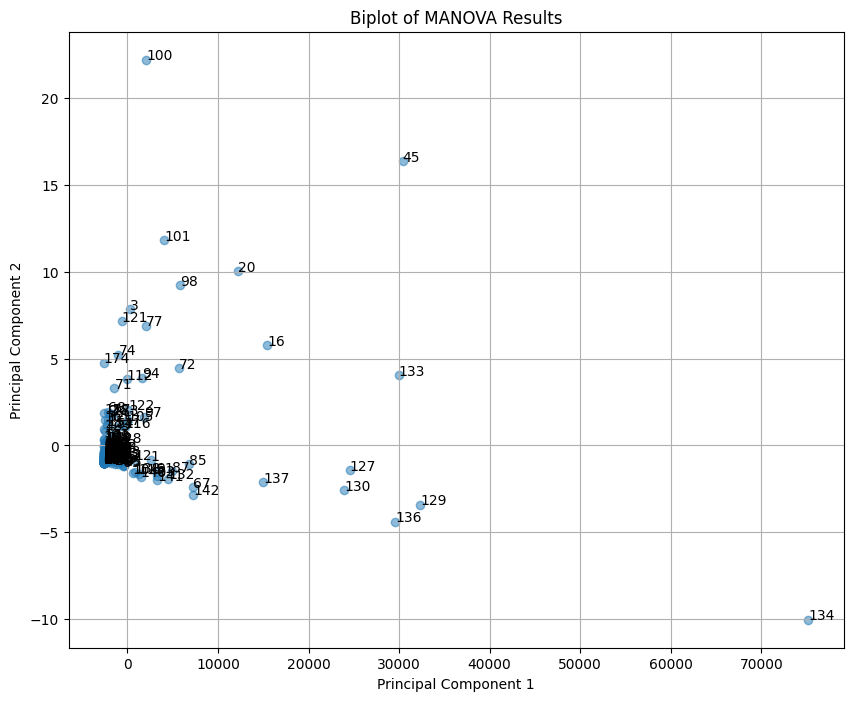

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.multivariate.manova import MANOVA
from sklearn.decomposition import PCA

# Extract the dependent variables
dependent_vars = df_manova[['Juicios', 'PC0_RES', 'PC0_PAT']]

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
components = pca.fit_transform(dependent_vars)

# Create the biplot
plt.figure(figsize=(10, 8))
plt.scatter(components[:, 0], components[:, 1], alpha=0.5)

# Add labels for each data point (optional)
for i, txt in enumerate(df_manova.index):
    plt.annotate(txt, (components[i, 0], components[i, 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot of MANOVA Results')
plt.grid(True)
plt.show()

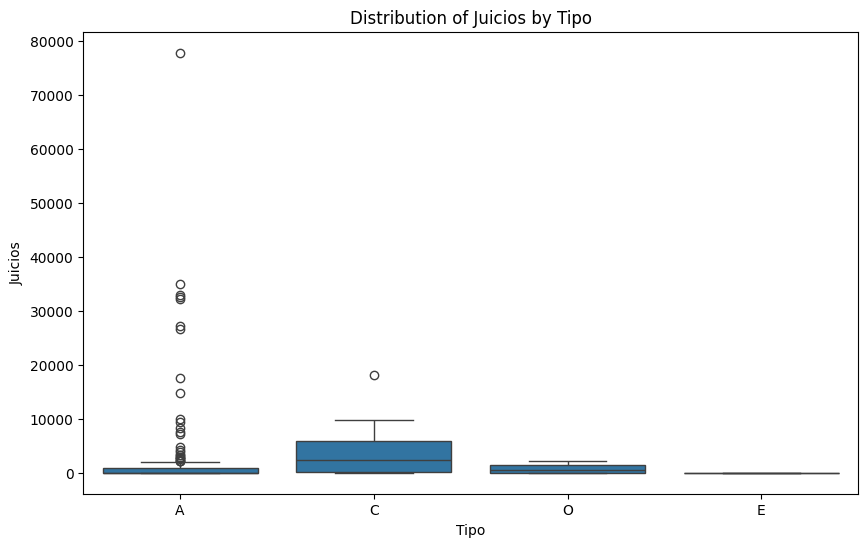

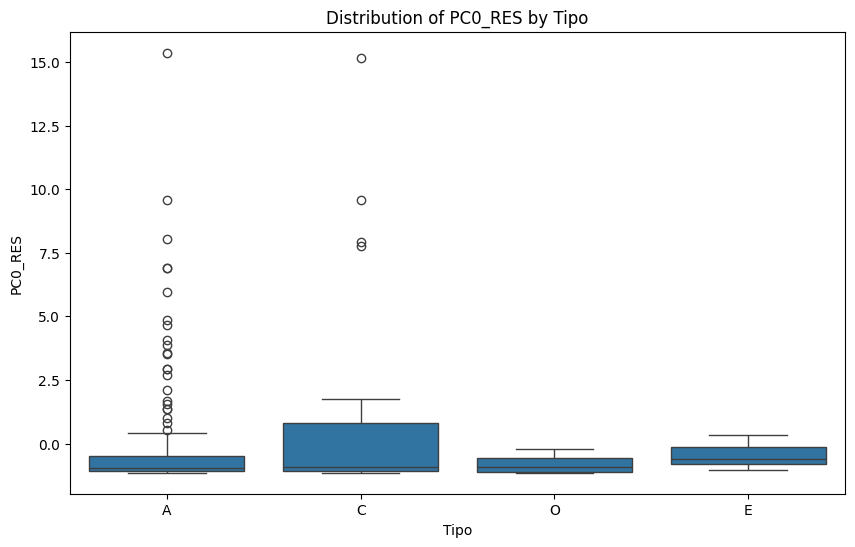

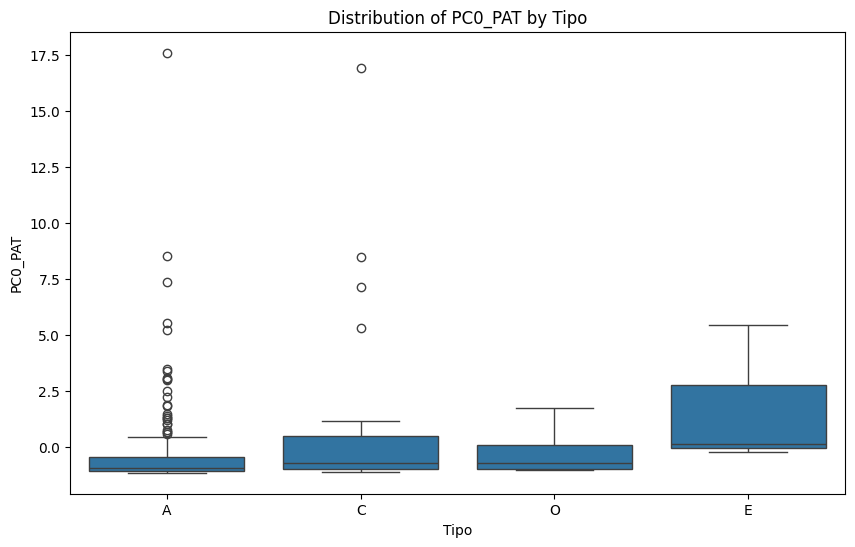

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for var in ['Juicios', 'PC0_RES', 'PC0_PAT']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Tipo', y=var, data=df_manova)
    plt.title(f'Distribution of {var} by Tipo')
    plt.show()



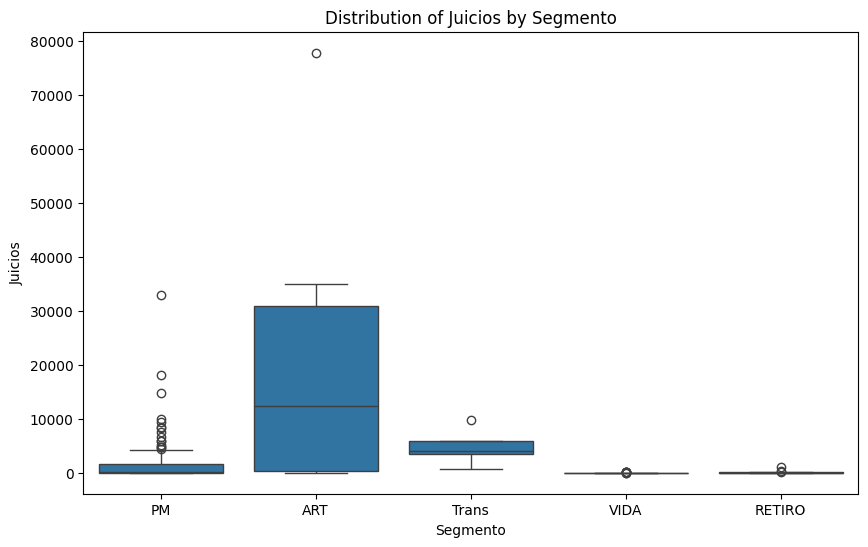

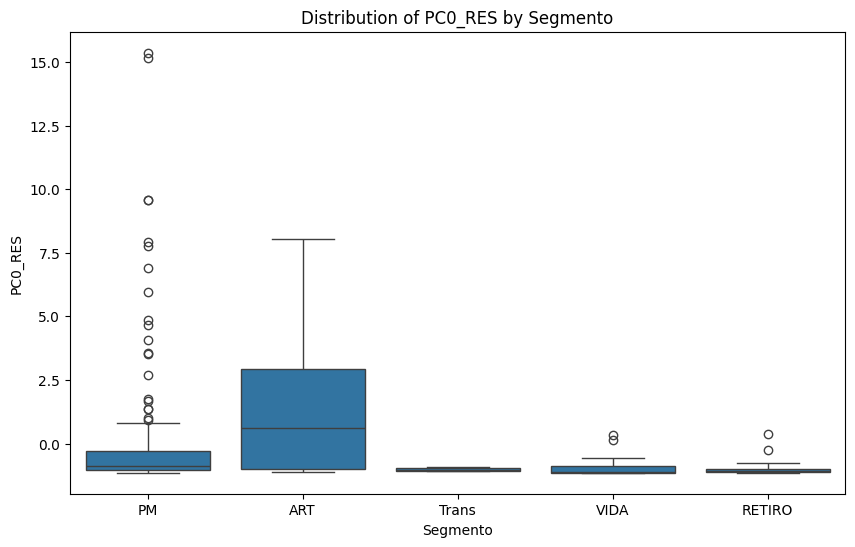

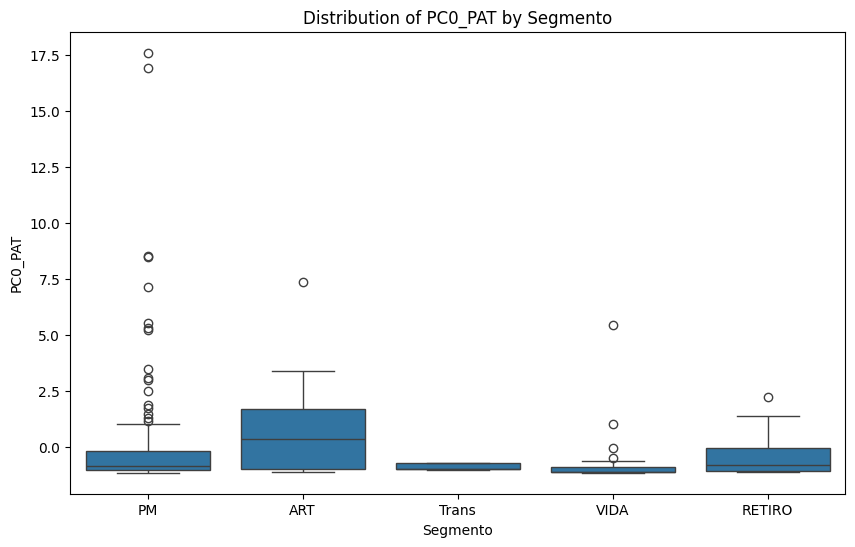

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for var in ['Juicios', 'PC0_RES', 'PC0_PAT']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Segmento', y=var, data=df_manova)
    plt.title(f'Distribution of {var} by Segmento')
    plt.show()

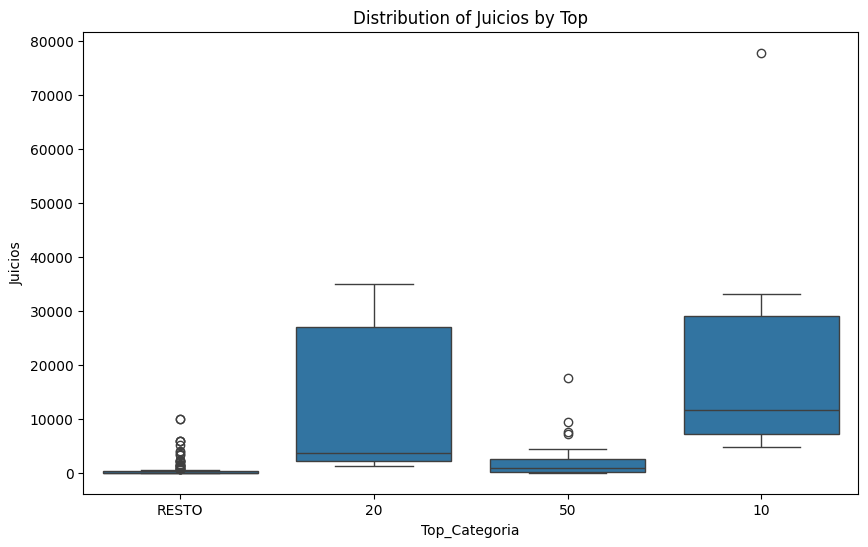

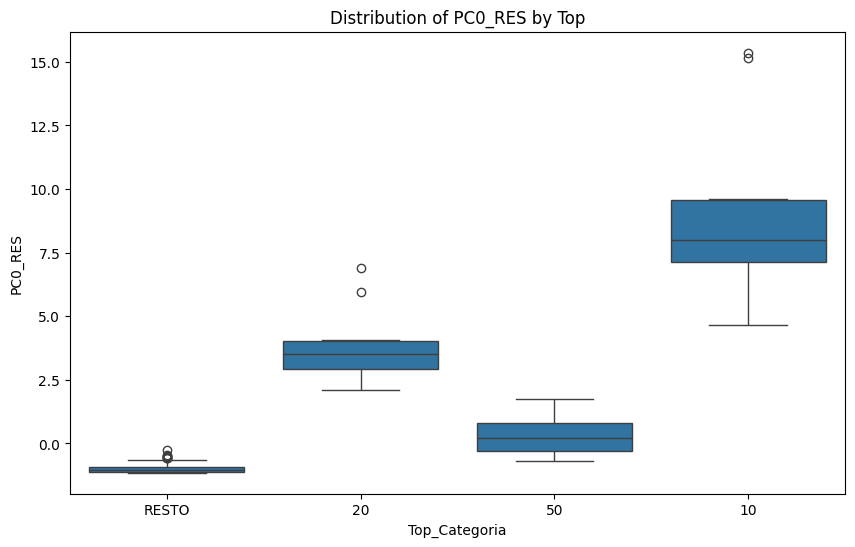

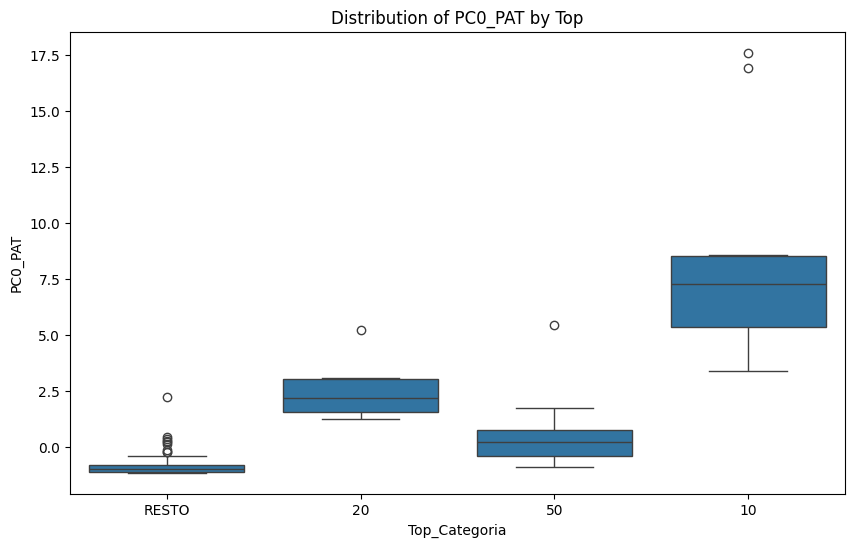

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for var in ['Juicios', 'PC0_RES', 'PC0_PAT']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Top_Categoria', y=var, data=df_manova)
    plt.title(f'Distribution of {var} by Top')
    plt.show()

## Modelo Manova Variables Optimas

In [ ]:
# Crear el modelo MANOVA
md = MANOVA.from_formula('Juicios + PC6_PAT ~ C(Tipo) + C(Segmento) + C(Top_Categoria)', data=df_manova)

# Obtener los resultados
print(md.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.4256 2.0000 179.0000 120.7761 0.0000
         Pillai's trace 0.5744 2.0000 179.0000 120.7761 0.0000
 Hotelling-Lawley trace 1.3495 2.0000 179.0000 120.7761 0.0000
    Roy's greatest root 1.3495 2.0000 179.0000 120.7761 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         C(Tipo)         Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.8627 6.0000 358.0000  4.5740 0.0002
          Pillai's trace 0.1387 6.0000 360.0000  4.4695 0.0002
  Hotelling

In [ ]:
# Crear el modelo MANOVA
md = MANOVA.from_formula('Juicios + PC8_RES ~ C(Tipo) + C(Segmento) + C(Top_Categoria)', data=df_manova)

# Obtener los resultados
print(md.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.4370 2.0000 179.0000 115.2996 0.0000
         Pillai's trace 0.5630 2.0000 179.0000 115.2996 0.0000
 Hotelling-Lawley trace 1.2883 2.0000 179.0000 115.2996 0.0000
    Roy's greatest root 1.2883 2.0000 179.0000 115.2996 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         C(Tipo)         Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.9537 6.0000 358.0000  1.4300 0.2020
          Pillai's trace 0.0464 6.0000 360.0000  1.4255 0.2037
  Hotelling

In [ ]:
# Crear el modelo MANOVA
md = MANOVA.from_formula('Juicios + PC8_RES + PC6_PAT ~ C(Tipo) + C(Segmento) + C(Top_Categoria)', data=df_manova)

# Obtener los resultados
print(md.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
        Intercept        Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.4255 3.0000 178.0000 80.0963 0.0000
          Pillai's trace 0.5745 3.0000 178.0000 80.0963 0.0000
  Hotelling-Lawley trace 1.3499 3.0000 178.0000 80.0963 0.0000
     Roy's greatest root 1.3499 3.0000 178.0000 80.0963 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         C(Tipo)         Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.8497 9.0000 433.3558  3.3318 0.0006
          Pillai's trace 0.1535 9.0000 540.0000  3.2354 0.0008
  Hotelling

In [ ]:
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
import numpy as np

# Obtener los resultados del MANOVA
md = MANOVA.from_formula('Juicios + PC8_RES + PC6_PAT ~ C(Tipo) + C(Segmento) + C(Top_Categoria)', data=df_manova)
results = md.mv_test()


In [ ]:
print(results)

                  Multivariate linear model
                                                              
--------------------------------------------------------------
        Intercept        Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.4255 3.0000 178.0000 80.0963 0.0000
          Pillai's trace 0.5745 3.0000 178.0000 80.0963 0.0000
  Hotelling-Lawley trace 1.3499 3.0000 178.0000 80.0963 0.0000
     Roy's greatest root 1.3499 3.0000 178.0000 80.0963 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         C(Tipo)         Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.8497 9.0000 433.3558  3.3318 0.0006
          Pillai's trace 0.1535 9.0000 540.0000  3.2354 0.0008
  Hotelling

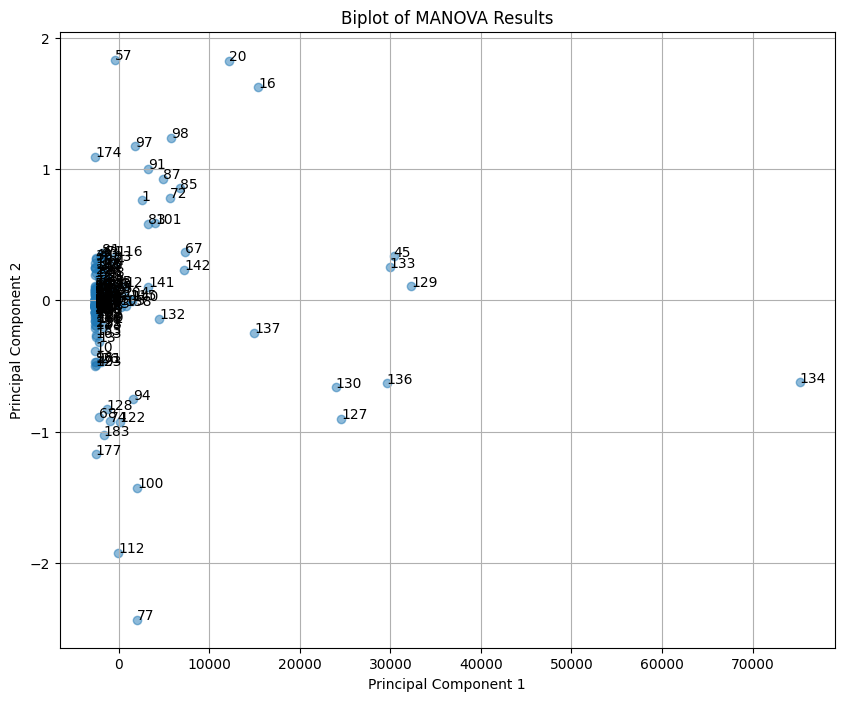

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.multivariate.manova import MANOVA
from sklearn.decomposition import PCA

# Extract the dependent variables
dependent_vars = df_manova[['Juicios', 'PC8_RES', 'PC6_PAT']]

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
components = pca.fit_transform(dependent_vars)

# Create the biplot
plt.figure(figsize=(10, 8))
plt.scatter(components[:, 0], components[:, 1], alpha=0.5)

# Add labels for each data point (optional)
for i, txt in enumerate(df_manova.index):
    plt.annotate(txt, (components[i, 0], components[i, 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot of MANOVA Results')
plt.grid(True)
plt.show()

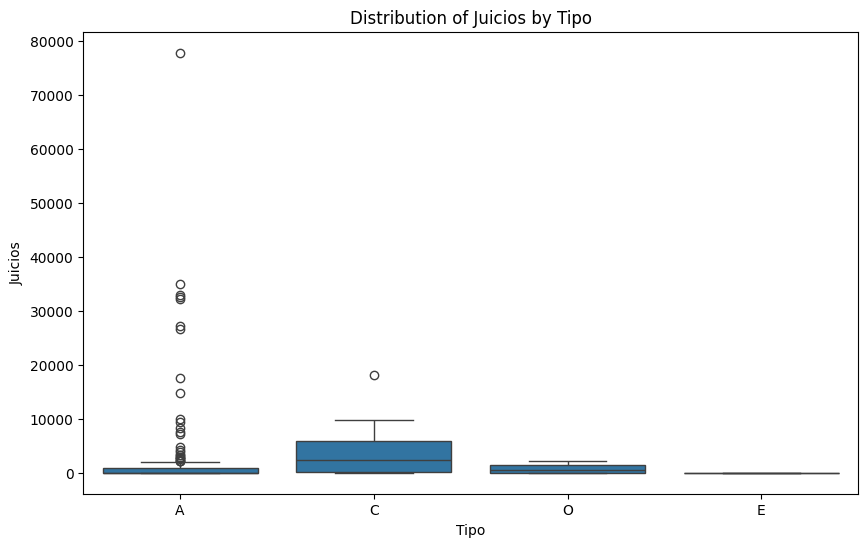

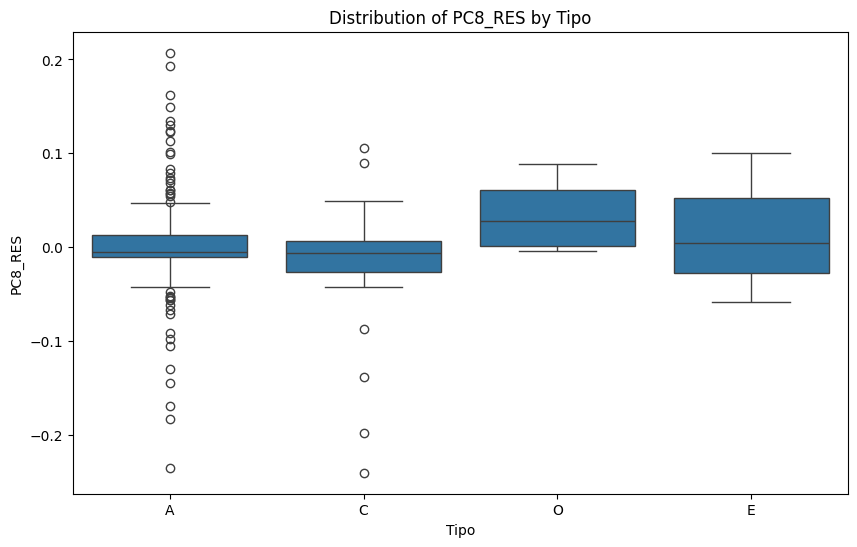

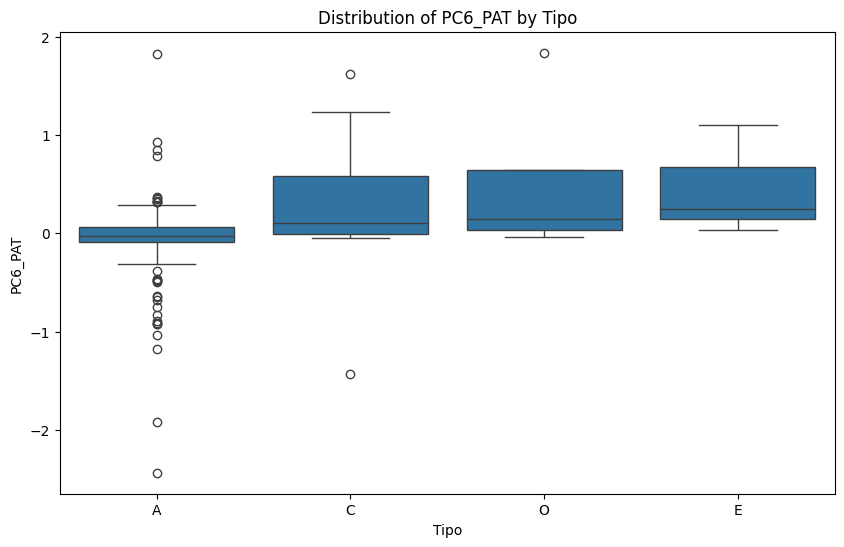

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for var in ['Juicios', 'PC8_RES', 'PC6_PAT']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Tipo', y=var, data=df_manova)
    plt.title(f'Distribution of {var} by Tipo')
    plt.show()



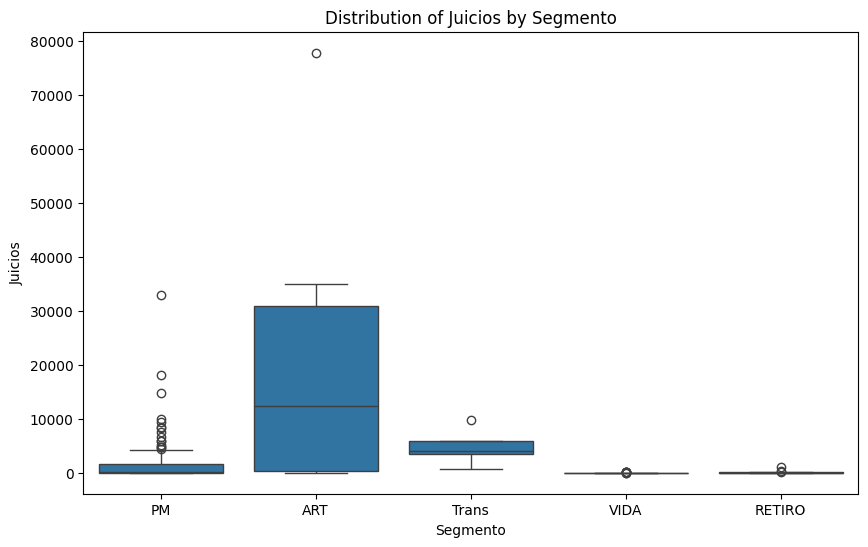

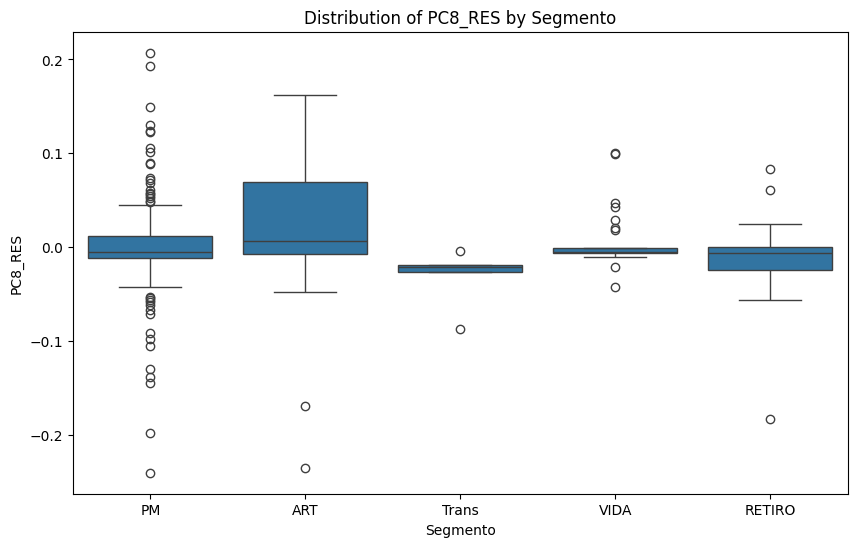

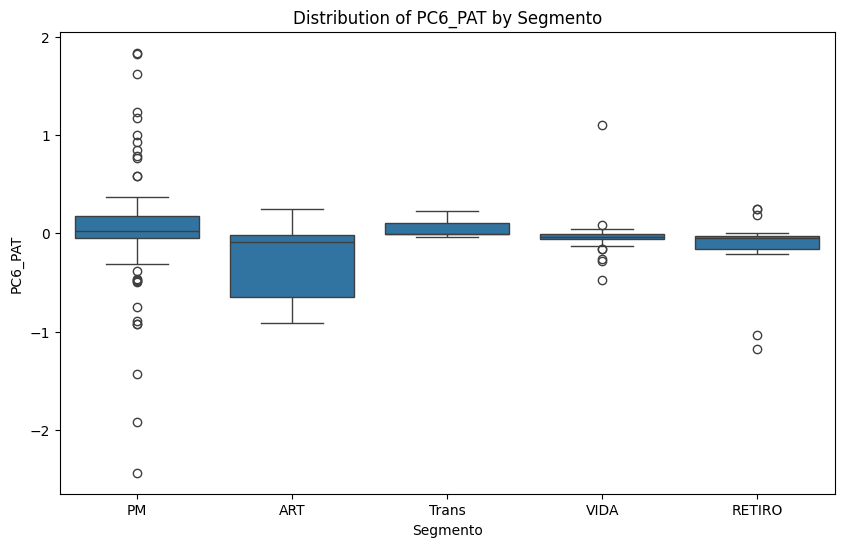

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for var in ['Juicios', 'PC8_RES', 'PC6_PAT']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Segmento', y=var, data=df_manova)
    plt.title(f'Distribution of {var} by Segmento')
    plt.show()

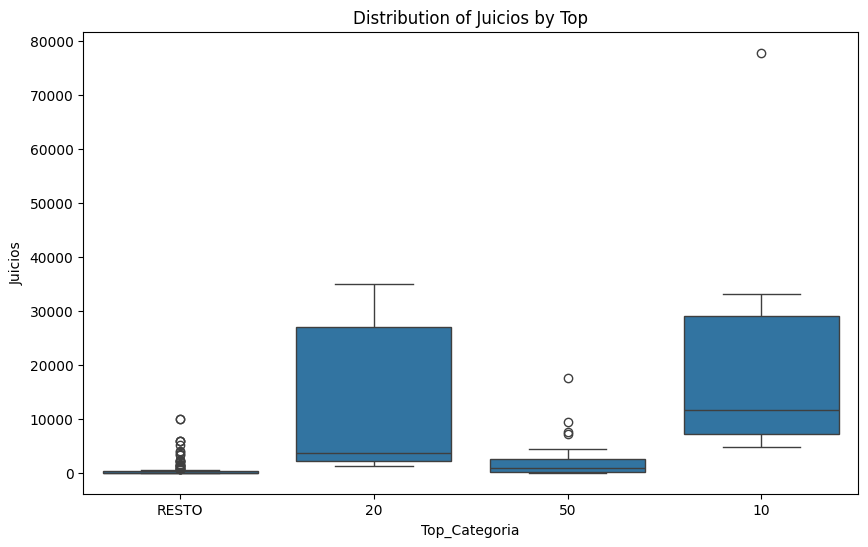

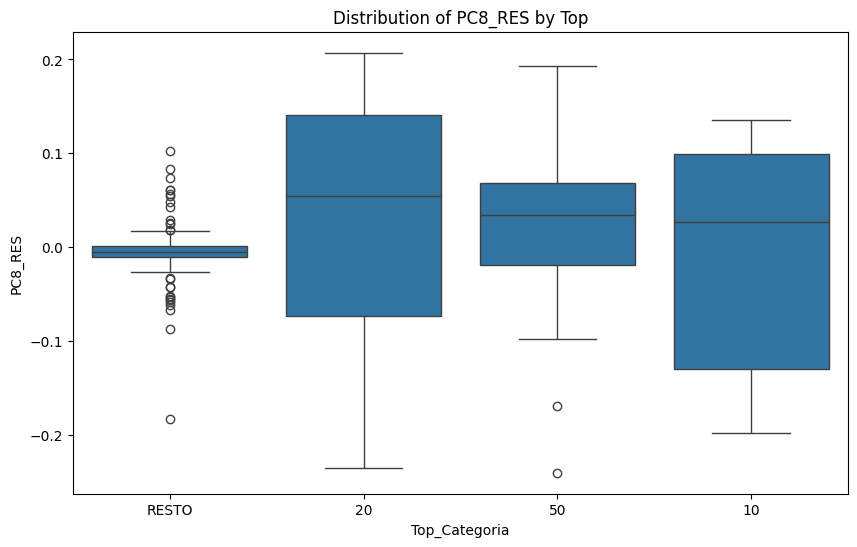

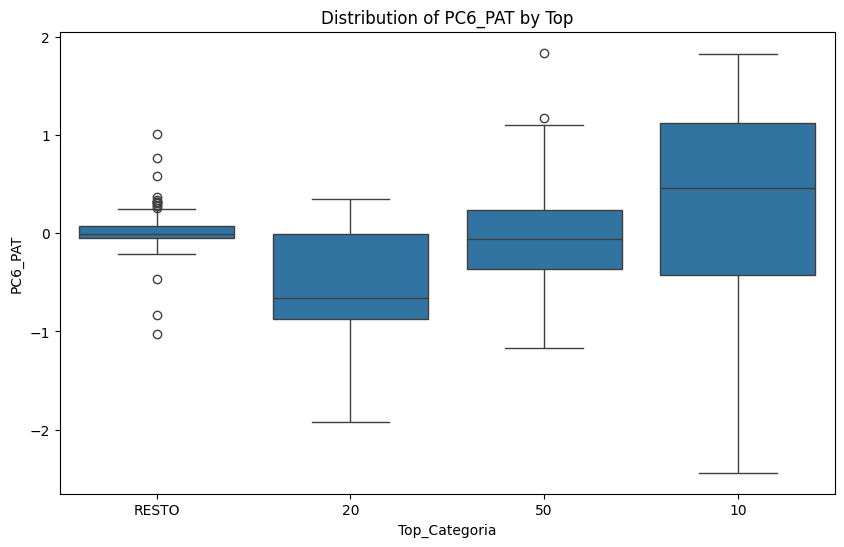

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for var in ['Juicios', 'PC8_RES', 'PC6_PAT']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Top_Categoria', y=var, data=df_manova)
    plt.title(f'Distribution of {var} by Top')
    plt.show()

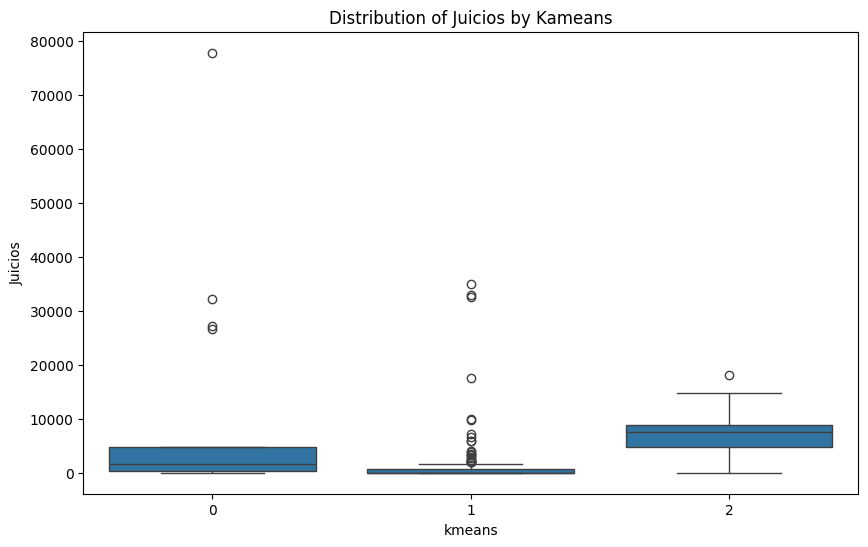

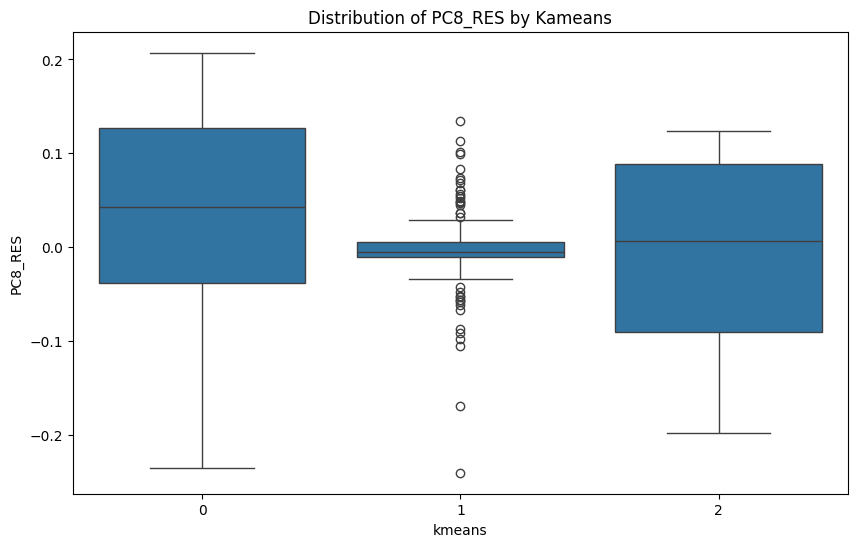

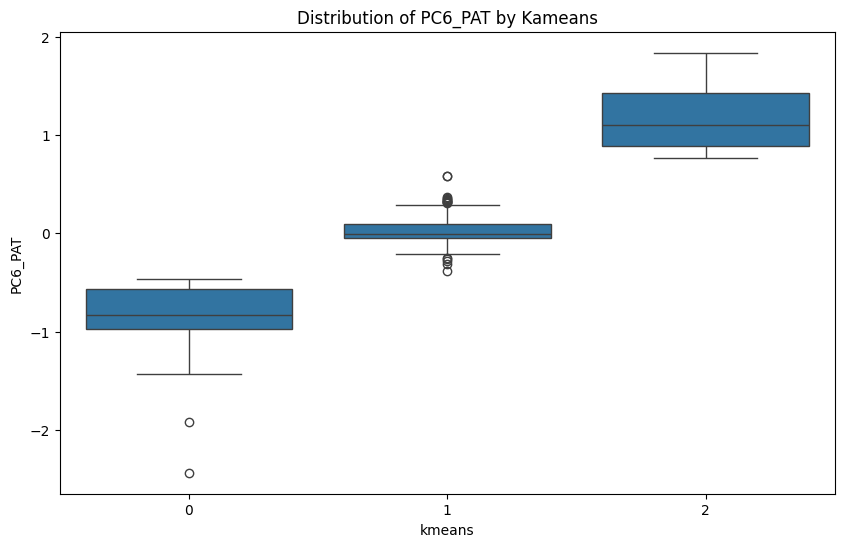

In [ ]:
import seaborn as sns #Pendiente el gráfico  con los kmeeans tambien
import matplotlib.pyplot as plt

for var in ['Juicios', 'PC8_RES', 'PC6_PAT']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='kmeans', y=var, data=df_manova)
    plt.title(f'Distribution of {var} by Kameans')
    plt.show()